# Assignment 2
-------
## Particulars

This assignment is due Thursday March 21, 2019. The last commit at (or before) 23h59 on that date will be graded for credit.

It must be turned in (committed) to your private repository on the course's github organization located at [github.com/orgs/mgt-416-2019](https://github.com/orgs/mgt-416-2019).

__Commit early and commit often.__

-------
## Types of Problems and Evaluation

On this assignment there are two types of questions: <span style="color:red">Technical</span> and <span style="color:blue">Analytical</span>.

The primary goal of a <span style="color:red">technical</span> problem is to carry out the requested coding/computational analysis and output or visualize the result. In these problems the primary factors in evaluation are: does the code/analysis work; does it do what it is supposed to do; is it comprehensible (_i.e._ commented [always] and explained [in cases where code is very involved]).

The primary goal of an <span style="color:blue">analytical</span> problem is to answer a question about some network(s) or data being certain to justifying your answer with a well thought out, and presented, line of reasoning. In these problems the primary factors in evaluation are: is the answer well thought out and it well presented and intelligibile (you are strongly advised to make use of [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [magics](http://ipython.readthedocs.io/en/stable/interactive/magics.html) _ex_. %%latex or $\latex$ in your answers).

Each problem and question has associated with it a number of points that it will be graded out of. Please use the point values as a guide as to how much time/effort should be devoted to each question.

-------
## Instructions

Complete each of the problems found below to the best of your abilities. It is highly advisable that you at least attempt each problem/question.

After the cell proposing each problem there is a markdown cell in which your mark for each question will be recorded and a code cell in which your total mark for that problem will be stored. __Do not edit these cells.__

Following the marking cells there is a series of cells you may use to complete each question. Feel free to add additional markdown and code cells as required.

If you encounter any major issues, require clarification and/or you believe there is an error in a question or the data, do not hesitate to email me at: [orion.penner@epfl.ch](mailto:orion.penner@epfl.ch).

-------
## Data Notes

Several problems in this assignment deal with a football transfer dataset scraped from [transfermarkt.com](https://www.transfermarkt.com/). Specifically, it considers all transfers from the calendar years 2015-2017.

The network constructed from this data is being given to you in graphML format and a wide variety of quantities and variables have already been calculated. I have tried to label these in as straightforward a manner as possible, but do take a moment to familiarize yourself with them before diving into the analysis (_hint_: results and interpretation differ a great deal depending on, for example, which link weight you use.). In this network the links are directed and they point to the club receiving the player in a transaction.

You should also note that clubs are identified by their link within [transfermarkt.com](https://www.transfermarkt.com/). In many cases this will not match the name you are familiar with for a given club. But you can use a node's Club_ID to get its URL. For example, for the node with Club_ID = '/varda-se/startseite/verein/30613', its URL is [transfermarkt.com/varda-se/startseite/verein/30613](https://www.transfermarkt.com/varda-se/startseite/verein/30613)

-------
## Imports

The packages imported below are necessary for completing the assignment.

If there are other packages you are used to using that you wish to import, please feel free to do so __provided__ the package is __fully installable through pip__. If you want clarification on this, please email me.

In [1]:
# Allows matplotlib figures inline
%matplotlib inline
# Our standard network analysis module. Please use as nx so I may read code more easily.
import networkx as nx
# Our standard ploting module. Again, please use as plt.
import matplotlib.pyplot as plt

The next imports are some packages I used in completing the problems to improve aesthetics or efficiency.

But in no way are the necessary for solving each problem and if you don't use them it will not affect your grade in anyway.

In [2]:
# Can be used to make the printing of certain objects (especially dictionaries and tuples) easier for humans.
import pprint
# Just a lazy way of supressing warnings
import warnings
warnings.filterwarnings('ignore')
# Pandas librairy useful to manipulate the data in question 3
import pandas as pd

In [3]:
# All this librairies are used to allows nice formatting and printing.
from __future__ import division
from IPython.core.display import HTML

----

In [4]:
# Initialize our list of problem scores
Scores = []

----

In [5]:
def plt_directed(G, title):
    '''
    This function allows the visualization of the directed graph given as input in a nice way.
    ARGS :
        - G : nx graph object which is the graph that we want to plot.
        - title : string corresponding to the title of the plot.
    RETURN :
        - None object is return but a plot is printed as output.
    '''
    plt.figure(figsize=(15,10))
    pos = nx.layout.spring_layout(G) # set a layout
    node_sizes = [3 + i/50 for i in range(len(G))] # set different size for each node
    M = G.number_of_edges()
    edge_colors = range(2, M + 2) # set different color for each edge
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
    edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes,
                                   arrowsize=1, edge_color=edge_colors,
                                   edge_cmap=plt.cm.Blues, width=0.3)

    ax = plt.gca()
    ax.set_axis_off()
    plt.title(title)
    plt.show()

----
## Problem 1

15 points.

In this problem you will explore a variety of centrality measures in the context of the Club-to-Club transfer network (Club-Club_TransferNetwork.graphml).

1. Calculate the following centrality measures for this network. Take care to use the specific variable indicated as the "weight" when indicated. Keep the results of each. I would suggest storing them in a dictionary. Note that running some of these measures may take a minute or two on your computer depending on its specifications. But none should take more than, say, 5 minutes. [<span style="color:red">Technical</span>] [5]
    * In and out degree centrality.
    * In and out degree centrality using "TotalValue" as the weight.
    * Closeness centrality.
    * Betweeness centrality.
    * Betweeness centrality using "Inverse_TotalValue" as the weight $\left(\frac{1}{\mathrm{Total~value~of~transfers}}\right)$
    * PageRank using "Number_nonFree" as the weight. (This is just the number of transfers between the clubs in which money actually changed hands).
    * PageRank using "TotalValue" as the weight.
    * Eigenvector centrality.
    * Eigenvector centrality using "TotalValue" as the weight.
2. For each of the centrality measures calculated in the previous question, print the Top 10 clubs according to that measure, along with their score for that measure, league and country. Use a formatted print statement. As you have to print many rankings, I advise you make a function that does the sorting and printing the scores. [<span style="color:red">Technical</span>] [1]
3. What are your first impressions of these rankings? Do some appear to make sense? Do some obviously make no sense? Very briefly explain how you formed these impressions (just a few sentences). _Note_: If you are unfamiliar with club football consider using [UEFA's club performance rankings](https://www.uefa.com/memberassociations/uefarankings/club/index.html), [Forbes' value rankings](https://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs) and/or [Transfermarkt's club values](https://www.transfermarkt.co.uk/spieler-statistik/wertvollstemannschaften/marktwertetop) for this and subsequent Analytical questions. [<span style="color:blue">Analytical</span>] [3]
4. If you had to choose one measure to serve as a proxy for club prestige, which would you choose. Why? Do not base your answer and justification _only_ on how well the ranking matches your point of view, also defend your answer using your understanding of the measure itself. [<span style="color:blue">Analytical</span>] [2]
5. Scatter plot in-degree centrality (using "TotalValue" as weight) _vs_ out-degree centrality (again using "TotalValue" as weight). [<span style="color:red">Technical</span>] [1]
6. What does the plot created in the previous question tell you? Specifically, what does a node's position in the scatter relative to the line x=y tell you? [<span style="color:blue">Analytical</span>] [1]
7. Scatter plot in-degree centrality ("TotalValue" as weight) _vs_ PageRank ("TotalValue" as weight). [<span style="color:red">Technical</span>] [1]
8. How strong is the correlation between in-degree centrality and PageRank? Based on how PageRank is calculated, did you expect this relationship? How do you interpret the outliers of this relationship?[<span style="color:blue">Analytical</span>] [1]

#### Problem 1 Marks

1.1) Null/5

1.2) Null/1

1.3) Null/3

1.4) Null/2

1.5) Null/1

1.6) Null/1

1.7) Null/1

1.8) Null/1

Total: Null/15

In [6]:
Problem1Score = None
Scores.append(Problem1Score)

----

In [7]:
# Load the transfer network.
TransferNetwork_Club = nx.read_graphml('Club-Club_TransferNetwork.graphml')
print(nx.info(TransferNetwork_Club))

Name: Transfers_CountryFiltered_EdgeFiltered_SCC
Type: DiGraph
Number of nodes: 1996
Number of edges: 9651
Average in degree:   4.8352
Average out degree:   4.8352


In [8]:
# Example of the different attributes of a node
TransferNetwork_Club.node['/delfino-pescara-1936/startseite/verein/2921']

{'Club_ID': '/delfino-pescara-1936/startseite/verein/2921',
 'Club_Name': 'Pescara',
 'Club_League': 'Serie B',
 'Club_LeagueNation': 'Italy'}

In [9]:
# Example of the different attributes of an edge
TransferNetwork_Club.edge['/cd-palestino/startseite/verein/6536']

{'/csd-colo-colo/startseite/verein/2433': {'Number': 2,
  'Number_w_Value': 1,
  'Number_nonFree': 1,
  'TotalValue': 450000.0,
  'Inverse_TotalValue': 2.222222222222222e-06},
 '/club-universidad-de-chile/startseite/verein/1037': {'Number': 1,
  'Number_w_Value': 1,
  'Number_nonFree': 1,
  'TotalValue': 365000.0,
  'Inverse_TotalValue': 2.7397260273972604e-06}}

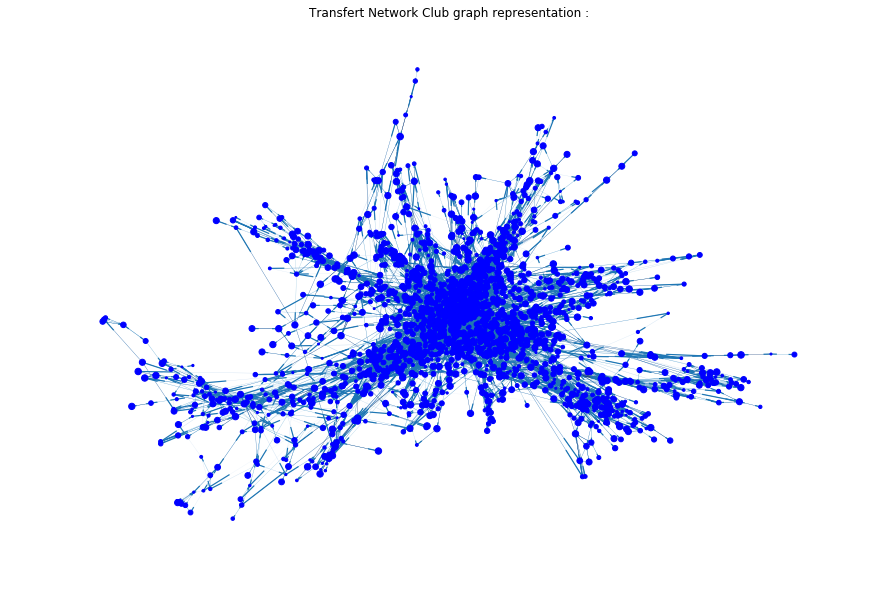

In [10]:
# Plot the graph thanks to the function define above
plt_directed(TransferNetwork_Club, 'Transfert Network Club graph representation :')

----

### 1.1
**Calculate the following centrality measures for this network. Store results in a dictionary.  Take care to use the specific variable indicated as the "weight" when indicated.**


In [11]:
# To calculate in_degree_centrality using TotalValue as weight, we need to have the total sum of the TotalValues.
tot_weight = 0
for i in TransferNetwork_Club.nodes():
    for j in TransferNetwork_Club.edge[i]:
        tot_weight += TransferNetwork_Club.edge[i][j]['TotalValue']

# Explanation about this way of finding the in and out degree centrality using "TotalValue" as the weight is descreibed below
df_in_degree_weighted = TransferNetwork_Club.in_degree(weight = 'TotalValue')
for i in df_in_degree_weighted.keys():
    df_in_degree_weighted[i] =  df_in_degree_weighted[i]/ tot_weight
    
df_out_degree_weighted = TransferNetwork_Club.out_degree(weight = 'TotalValue')
for i in df_out_degree_weighted.keys():
    df_out_degree_weighted[i] =  df_out_degree_weighted[i]/ tot_weight

**An explanation about the calculus of the in and out degree centrality using "TotalValue" as the weight is needed.** In fact, this weighted in and out degree centrality measure is the only statistic without any build in function made to find it. Thus, the process is a little bit more complicated. 

By definition, the degree centrality makes the assumption that the most connected nodes are the most
important. Degree centrality just says a node is important when many others are attached to it. **So a node’s degree, is also its degree centrality score.** You thus use this fact to calculate the weighted version. In/Out degree can, of course, be distinguished.

For the in and out degree centrality calculation, we use the networkx function in_degree_centrality (and out_degree_centrality). We found out that **this measure returned the degree of node divided by the total number of node in the graph.** It gives a kind of relative importance measure between 0 and 1 which make sense by definition of the degree centrality.

Thus, we did the same for the weighted version. Indeed, we calculate the sum of all TotalValue elements present in the graph. **Then, we use the in_degree (and out_degree) build in function, with the weight parameter set up to, find weighted in/out degree per node and finally we divide each one of this values by the sum of all TotalValue elements to find our in and out degree centrality using "TotalValue" as the weight.**

In [12]:
# We store all the centrality measure in a dictionaryr
centrality_measure = dict()
centrality_measure = {'in_degree_centrality': nx.in_degree_centrality(TransferNetwork_Club), 
                      'out_degree_centrality': nx.out_degree_centrality(TransferNetwork_Club),
                      'in_degree_centrality_total_value_weight': df_in_degree_weighted, 
                      'out_degree_centrality_total_value_weight': df_out_degree_weighted,
                      'closeness_centrality': nx.closeness_centrality(TransferNetwork_Club),
                      'betweeness_centrality': nx.betweenness_centrality(TransferNetwork_Club),
                      'betweeness_centrality_inverse_total_value_weight': nx.betweenness_centrality(TransferNetwork_Club, weight= 'Inverse_TotalValue'),
                      'pagerank_number_nonfree_weight': nx.pagerank(TransferNetwork_Club, weight= 'Number_nonFree'),
                      'pagerank_totalvalue_weight': nx.pagerank(TransferNetwork_Club, weight= 'TotalValue'),
                      'eigenvector_centrality': nx.eigenvector_centrality(TransferNetwork_Club),
                      'eigenvector_centrality_total_value_weight': nx.eigenvector_centrality(TransferNetwork_Club, weight= 'TotalValue'),
                     }
                      

In [13]:
# We use the pprint library to allow a nice printing of our huge dictionary
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(centrality_measure)

{   'betweeness_centrality': {   '/%C5%9Eanl%C4%B1urfaspor/startseite/verein/6630': 0.0017556883219724375,
                                 '/-rjo-feyenoord-excelsior-u19/startseite/verein/2862': 0.0010176814023495069,
                                 '/1-fc-heidenheim/startseite/verein/2036': 0.002753188774810385,
                                 '/1-fc-kaiserslautern-ii/startseite/verein/151': 0.002289967281379586,
                                 '/1-fc-kaiserslautern/startseite/verein/2': 0.005020923621809029,
                                 '/1-fc-koln-ii/startseite/verein/438': 0.0005053437252017423,
                                 '/1-fc-koln/startseite/verein/3': 0.0023102321193530923,
                                 '/1-fc-magdeburg/startseite/verein/187': 0.00019024935766694866,
                                 '/1-fc-nurnberg/startseite/verein/4': 0.0043761554061955464,
                                 '/1-fc-saarbrucken/startseite/verein/1': 0.0005126237507695505,
      

                                 '/holstein-kiel/startseite/verein/269': 0.00020033652311485668,
                                 '/hsc-montpellier/startseite/verein/969': 0.0014743695789361465,
                                 '/hsk-zrinjski-mostar/startseite/verein/6808': 0.006166152405168452,
                                 '/huddersfield-town/startseite/verein/1110': 0.00451146351034485,
                                 '/hull-city/startseite/verein/3008': 0.00458882049441107,
                                 '/hunan-billows-f-c-/startseite/verein/28377': 0.0009189328089628041,
                                 '/huracan-futbol-club/startseite/verein/34318': 0.000998302805601994,
                                 '/ia-sud-america-montevideo/startseite/verein/1806': 0.001764281303420333,
                                 '/if-elfsborg-boras/startseite/verein/1101': 0.00026278005974509857,
                                 '/if-gnistan/startseite/verein/23564': 0.0,
                    

                                 '/wigan-athletic/startseite/verein/1071': 0.004757246478656858,
                                 '/wigry-suwa%C5%82ki/startseite/verein/10453': 0.0010410140607696034,
                                 '/willem-ii-tilburg/startseite/verein/403': 0.0033213966320915994,
                                 '/wisla-krakau/startseite/verein/422': 0.005695996373245738,
                                 '/wisla-plock/startseite/verein/2118': 0.0017699338421942284,
                                 '/wisla-pulawy/startseite/verein/29403': 0.002023589124759216,
                                 '/woking-fc/startseite/verein/2796': 0.001175038179659592,
                                 '/wolfsberger-ac/startseite/verein/4441': 0.0012201264448193846,
                                 '/wolverhampton-wanderers/startseite/verein/543': 0.006529477560058875,
                                 '/worcester-city/startseite/verein/5548': 0.0015196022017399022,
                      

                                                            '/fc-cordoba/startseite/verein/993': 0.010018149687156709,
                                                            '/fc-coruxo/startseite/verein/13227': 0.004846462947740464,
                                                            '/fc-crotone/startseite/verein/4083': 0.0004949686151185386,
                                                            '/fc-dagenham-amp-redbridge/startseite/verein/3696': 0.0010047686920410354,
                                                            '/fc-dallas/startseite/verein/8816': 0.0034783548640910204,
                                                            '/fc-delta-dobrogea/startseite/verein/43914': 0.0011837166430269117,
                                                            '/fc-den-bosch/startseite/verein/404': 0.0,
                                                            '/fc-dunarea-calarasi/startseite/verein/37239': 0.0011691728292282043,
                    

                                                            '/vv-emmen/startseite/verein/44674': 0.0,
                                                            '/vv-ijsselmeervogels/startseite/verein/7116': 0.0005042697013345803,
                                                            '/vv-st-truiden/startseite/verein/475': 0.0,
                                                            '/vvv-venlo/startseite/verein/1426': 0.0004979851836210386,
                                                            '/waasland-beveren/startseite/verein/28643': 0.0,
                                                            '/wadi-degla-fc/startseite/verein/18234': 0.0010017521235385356,
                                                            '/welling-united/startseite/verein/7454': 0.002001995962825821,
                                                            '/west-bromwich-albion/startseite/verein/984': 0.02752920415381483,
                                                        

                                '/fk-igman-konjic/startseite/verein/11100': 0.1364755780544534,
                                '/fk-indjija/startseite/verein/11044': 0.16690370618254832,
                                '/fk-jagodina/startseite/verein/12132': 0.17934196332254584,
                                '/fk-javor-ivanjica/startseite/verein/8819': 0.19105535338057844,
                                '/fk-jedinstvo-putevi-uzice/startseite/verein/32098': 0.13896628587350238,
                                '/fk-jedinstvo-stara-pazova/startseite/verein/38827': 0.14304151430415143,
                                '/fk-kafa-feodosiya/startseite/verein/50528': 0.13793818709811242,
                                '/fk-kalush/startseite/verein/33141': 0.10884390856020514,
                                '/fk-khimki/startseite/verein/3719': 0.14547178066209712,
                                '/fk-kolubara-lazarevac/startseite/verein/12514': 0.16425160546682036,
                        

                                '/wisla-plock/startseite/verein/2118': 0.18272577395127312,
                                '/wisla-pulawy/startseite/verein/29403': 0.1711124453212111,
                                '/woking-fc/startseite/verein/2796': 0.11198428290766209,
                                '/wolfsberger-ac/startseite/verein/4441': 0.1626181936746006,
                                '/wolverhampton-wanderers/startseite/verein/543': 0.17712865133623368,
                                '/worcester-city/startseite/verein/5548': 0.11683063949402671,
                                '/wsg-wietersdorf/startseite/verein/18345': 0.1232318240780777,
                                '/wuhan-zall-professional-f-c/startseite/verein/6450': 0.15794473913387697,
                                '/wuppertaler-sv/startseite/verein/299': 0.12061668681983072,
                                '/wurzburger-kickers/startseite/verein/1557': 0.14383561643835616,
                                '/wy

                                  '/fk-zeljeznicar-sarajevo/startseite/verein/2573': 8.217947494163015e-05,
                                  '/fk-zemun/startseite/verein/3521': 0.0014124773986653881,
                                  '/fk-zvijezda-09/startseite/verein/43452': 3.464627913436611e-05,
                                  '/flamengo-rio-de-janeiro/startseite/verein/614': 0.021402138479371318,
                                  '/fleetwood-town/startseite/verein/11177': 0.006019499117154027,
                                  '/fluminense-football-club/startseite/verein/2462': 0.01837076056843062,
                                  '/foggia-calcio/startseite/verein/704': 0.007606263395715171,
                                  '/folgore-falerone-montegranaro/startseite/verein/50405': 3.926362185216339e-05,
                                  '/foligno-calcio/startseite/verein/11337': 1.8085455087911559e-07,
                                  '/foolad-fc/startseite/verein/6076': 4.57

                                                     '/abc-futebol-clube-rn-/startseite/verein/7209': 0.0,
                                                     '/aberdeen-fc/startseite/verein/370': 0.0,
                                                     '/ac-ajaccio/startseite/verein/1147': 9.802576703151555e-08,
                                                     '/ac-bellaria-igea-marina/startseite/verein/10643': 0.0,
                                                     '/ac-cesena/startseite/verein/1429': 0.0006744262238344489,
                                                     '/ac-cuneo-1905/startseite/verein/4150': 0.0,
                                                     '/ac-florenz/startseite/verein/430': 0.013427693050378008,
                                                     '/ac-horsens/startseite/verein/2414': 0.0,
                                                     '/ac-kajaani/startseite/verein/26738': 0.0,
                                                     '/a

                                                     '/lierse-sk/startseite/verein/204': 0.0,
                                                     '/ligorna-1922/startseite/verein/50100': 0.0,
                                                     '/linares-deportivo/startseite/verein/12351': 0.0,
                                                     '/lincoln-city/startseite/verein/1198': 0.0,
                                                     '/liverpool-fc-montevideo/startseite/verein/10663': 0.0,
                                                     '/lleida-esportiu/startseite/verein/33593': 0.0,
                                                     '/lokomotiv-mezdra/startseite/verein/19214': 0.0,
                                                     '/lokomotiv-moskau/startseite/verein/932': 0.0018001169987471913,
                                                     '/lokomotiv-sofia/startseite/verein/730': 0.0,
                                                     '/lokomotive-plovd

                                '/ca-bastia/startseite/verein/28559': 0.0015037593984962407,
                                '/ca-batna/startseite/verein/24868': 0.0010025062656641604,
                                '/ca-bordj-bou-arreridj/startseite/verein/22830': 0.0020050125313283208,
                                '/ca-cerro/startseite/verein/14806': 0.0040100250626566416,
                                '/ca-douglas-haig-de-pergamino/startseite/verein/14718': 0.0005012531328320802,
                                '/ca-fenix/startseite/verein/3829': 0.0020050125313283208,
                                '/ca-independiente-de-avellaneda/startseite/verein/1234': 0.005513784461152882,
                                '/ca-osasuna-b/startseite/verein/8516': 0.0015037593984962407,
                                '/ca-osasuna/startseite/verein/331': 0.0035087719298245615,
                                '/ca-penarol-montevideo/startseite/verein/861': 0.0015037593984962407,
             

                                '/piast-gliwice/startseite/verein/6112': 0.0040100250626566416,
                                '/picerno/startseite/verein/49430': 0.0010025062656641604,
                                '/pinerolo-football-club/startseite/verein/39368': 0.0010025062656641604,
                                '/pineto-calcio/startseite/verein/46337': 0.002506265664160401,
                                '/pirin-razlog/startseite/verein/40302': 0.0005012531328320802,
                                '/pittsburgh-riverhounds/startseite/verein/4290': 0.0010025062656641604,
                                '/platanias-chania/startseite/verein/21957': 0.0040100250626566416,
                                '/plymouth-argyle/startseite/verein/2262': 0.0020050125313283208,
                                '/podbeskidzie-bielsko-biala/startseite/verein/6361': 0.006015037593984963,
                                '/pogo%C5%84-siedlce/startseite/verein/4896': 0.0030075187969924814,
   

                                                   '/criciuma-esporte-clube/startseite/verein/7178': 0.0,
                                                   '/crystal-palace/startseite/verein/873': 0.010589605018907041,
                                                   '/cs-balotesti/startseite/verein/37621': 0.0,
                                                   '/cs-cerrito/startseite/verein/18077': 0.0,
                                                   '/cs-constantine/startseite/verein/30685': 8.849252104936245e-07,
                                                   '/cs-dunarea-turris-turnu-magurele/startseite/verein/37206': 0.0,
                                                   '/cs-fc-caransebes/startseite/verein/41430': 0.0,
                                                   '/cs-hammam-lif/startseite/verein/22815': 0.0,
                                                   '/cs-maritimo/startseite/verein/1301': 7.374376754113538e-06,
                                          

                                                   '/ssd-group-citta-di-castello/startseite/verein/27550': 0.0,
                                                   '/ssd-jesina-calcio/startseite/verein/34093': 0.0,
                                                   '/ssv-jahn-regensburg/startseite/verein/109': 2.9497507016454153e-06,
                                                   '/st-mirren-fc/startseite/verein/465': 0.0,
                                                   '/stabaek-if/startseite/verein/1274': 0.0,
                                                   '/stade-brest-29/startseite/verein/3911': 1.1799002806581661e-05,
                                                   '/stade-gabesien/startseite/verein/22821': 0.0,
                                                   '/stade-reims/startseite/verein/1421': 8.849252104936245e-05,
                                                   '/stade-tunisien/startseite/verein/4812': 0.0,
                                                 

                                 '/foolad-fc/startseite/verein/6076': 0.0030075187969924814,
                                 '/forest-green-rovers/startseite/verein/3455': 0.0015037593984962407,
                                 '/forli-calcio/startseite/verein/9816': 0.002506265664160401,
                                 '/fort-lauderdale-strikers/startseite/verein/9713': 0.0015037593984962407,
                                 '/fortaleza-esporte-clube/startseite/verein/10870': 0.0035087719298245615,
                                 '/fortuna-dusseldorf-ii/startseite/verein/4690': 0.0020050125313283208,
                                 '/fortuna-dusseldorf/startseite/verein/38': 0.0040100250626566416,
                                 '/fotbal-frydek-mistek/startseite/verein/19083': 0.0005012531328320802,
                                 '/fredrikstad-fk/startseite/verein/3837': 0.0010025062656641604,
                                 '/frejus-saint-raphael-fc/startseite/verein/30200': 

    'out_degree_centrality_total_value_weight': {   '/%C5%9Eanl%C4%B1urfaspor/startseite/verein/6630': 7.669351824278079e-06,
                                                    '/-rjo-feyenoord-excelsior-u19/startseite/verein/2862': 0.0,
                                                    '/1-fc-heidenheim/startseite/verein/2036': 0.00019763329701024283,
                                                    '/1-fc-kaiserslautern-ii/startseite/verein/151': 0.0,
                                                    '/1-fc-kaiserslautern/startseite/verein/2': 0.0012300460425861382,
                                                    '/1-fc-koln-ii/startseite/verein/438': 0.0,
                                                    '/1-fc-koln/startseite/verein/3': 0.003952665940204856,
                                                    '/1-fc-magdeburg/startseite/verein/187': 0.0,
                                                    '/1-fc-nurnberg/startseite/verein/4': 0.0009468699752281783,
  

                                                    '/lokomotive-plovdiv/startseite/verein/2259': 5.899501403290831e-06,
                                                    '/los-angeles-galaxy/startseite/verein/1061': 0.00012978903087239828,
                                                    '/luceafarul-oradea/startseite/verein/34768': 0.0,
                                                    '/luch-energia-vladivostok/startseite/verein/4057': 0.0,
                                                    '/luneburger-sk-hansa/startseite/verein/18324': 0.0,
                                                    '/lupa-castelli-romani/startseite/verein/32013': 0.0,
                                                    '/luton-town/startseite/verein/1031': 0.0001094357510310449,
                                                    '/luverdense-esporte-clube-mt-/startseite/verein/21599': 0.0,
                                                    '/lyngby-bk/startseite/verein/369': 0.00012961204583029

                                          '/club-bizertin/startseite/verein/12717': 0.0002290511856110343,
                                          '/club-de-gimnasia-y-esgrima-la-plata/startseite/verein/1106': 0.0001868671217849346,
                                          '/club-deportivo-ebro/startseite/verein/47880': 0.00016071582160756304,
                                          '/club-deportivo-espoli/startseite/verein/13547': 0.00016071582160756304,
                                          '/club-deportivo-godoy-cruz/startseite/verein/12574': 0.0006717318277205711,
                                          '/club-deportivo-maldonado/startseite/verein/18075': 0.00032405728903372376,
                                          '/club-deportivo-quito/startseite/verein/944': 0.00016071582160756304,
                                          '/club-deportivo-river-plate-guayaquil-/startseite/verein/25569': 0.00016071582160756304,
                                          '/club-dep

                                          '/stade-reims/startseite/verein/1421': 0.000232332655889344,
                                          '/stade-tunisien/startseite/verein/4812': 0.00016071582160756304,
                                          '/stal-dniprodzerzhynsk/startseite/verein/16247': 0.00016071582160756304,
                                          '/stal-mielec/startseite/verein/22431': 0.00016071582160756304,
                                          '/standard-luttich/startseite/verein/3057': 0.0025159574315522307,
                                          '/steaua-bukarest/startseite/verein/301': 0.00175112527741625,
                                          '/stoke-city/startseite/verein/512': 0.0028033712055410597,
                                          '/stomil-olsztyn/startseite/verein/9055': 0.00016071582160756304,
                                          '/stranraer-fc/startseite/verein/3034': 0.00016071582160756304,
                                     

                                      '/fc-fulham/startseite/verein/931': 0.00157350557133947,
                                      '/fc-gateshead/startseite/verein/3456': 0.0001584917113894851,
                                      '/fc-genua-1893/startseite/verein/252': 0.0015071892661718887,
                                      '/fc-getafe-b/startseite/verein/8510': 0.0001584917113894851,
                                      '/fc-getafe/startseite/verein/3709': 0.0006614732385405346,
                                      '/fc-gillingham/startseite/verein/2814': 0.0001584917113894851,
                                      '/fc-girona/startseite/verein/12321': 0.0006535802351508639,
                                      '/fc-girondins-bordeaux/startseite/verein/40': 0.0018663377586617597,
                                      '/fc-granada-b/startseite/verein/21550': 0.0001584917113894851,
                                      '/fc-granada/startseite/verein/16795': 0.000812116517458

                                      '/zaglebie-lubin/startseite/verein/168': 0.00047416659522921443,
                                      '/zaglebie-sosnowiec/startseite/verein/6560': 0.0001584917113894851,
                                      '/zalaegerszegi-te-fc/startseite/verein/1391': 0.0001584917113894851,
                                      '/zamalek-sc/startseite/verein/664': 0.0015008056799878594,
                                      '/zamudio-sd/startseite/verein/21402': 0.0001584917113894851,
                                      '/zenit-2-st-petersburg/startseite/verein/16950': 0.0003193440666110805,
                                      '/zenit-izhevsk/startseite/verein/6433': 0.0001584917113894851,
                                      '/zenit-penza/startseite/verein/17399': 0.0001584917113894851,
                                      '/zenit-st-petersburg/startseite/verein/964': 0.003182154882583744,
                                      '/zfc-meuselwitz/startseit

### 1.2
**For each of the centrality measures calculated in the previous question, print the Top 10 clubs according to that measure, along with their score for that measure, league and country. Use a formatted print statement. As you have to print many rankings, I advise you make a function that does the sorting and printing the scores. **


In [14]:
def ten_best_feature_per_measure(centrality_measure):
    '''
    This function allows the selection of the ten best node according to a specific centrality measure.
    ARGS :
        - centrality_measure : Dictionary containing centrality measurement for each node of the graph per type of measure. 
    RETURN :
        - ten_best_per_measure : Dictionary containing for each one of the centrality measure the 10 best nodes.
    '''
    ten_best_per_measure = dict()
    for key in centrality_measure.keys():
        # We iterate on each key of the dictionary calculated just before. Then we sort the values and we take the 10 bigger ones.
        ten_best_per_measure[key] = (sorted([(value, key) for (key, value) in centrality_measure[key].items()])[-10:])
    return ten_best_per_measure

In [15]:
def print_the_best(ten_best_per_measure):
    '''
    This function allows the printing of a table for each centrality measure containing the ten best nodes with additional information.
    ARGS :
        - ten_best_per_measure: Dictionary containing for each one of the centrality measure the 10 best nodes.
    RETURN :
        - None object is returned, but a table for each centrality measure containing the ten best nodes with additional information.
    '''
    for key in ten_best_per_measure.keys():
        print(f'\nTOP 10 {key.upper()}:\nThe best 10 clubs for the {key} are the following : \n')
        tmp = pd.DataFrame()
        # We store in a list in the rigth order the additional informations asked. 
        tmp['Club_Name'] = [TransferNetwork_Club.node[i[1]]['Club_Name'] for i in ten_best_per_measure[key]] 
        tmp['Club_League'] = [TransferNetwork_Club.node[i[1]]['Club_League'] for i in ten_best_per_measure[key]] 
        tmp['Club_LeagueNation'] = [TransferNetwork_Club.node[i[1]]['Club_LeagueNation'] for i in ten_best_per_measure[key]] 
        # We create a list to store the centrality measure values
        tmp[key] = [i[0] for i in ten_best_per_measure[key]]
        # We sort the dataframe to print a nice TOP 10.
        tmp = tmp.sort_values(by = key, ascending = False).reset_index(drop = True)
        tmp.index = tmp.index + 1
        display(HTML(tmp.to_html())) # This command allows a nice printing of the dataframe in a HTML format.

In [16]:
print_the_best(ten_best_feature_per_measure(centrality_measure))


TOP 10 IN_DEGREE_CENTRALITY:
The best 10 clubs for the in_degree_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,in_degree_centrality
1,AS Roma,Serie A,Italy,0.014536
2,Olympiacos,Super League,Greece,0.014536
3,Juventus,Serie A,Italy,0.014035
4,Fiorentina,Serie A,Italy,0.013033
5,VfB Stuttgart,1.Bundesliga,Germany,0.013033
6,Aston Villa,Premier League,England,0.012531
7,Man City,Premier League,England,0.012531
8,VfL Wolfsburg,1.Bundesliga,Germany,0.012531
9,Watford,Championship,England,0.012030
10,Sampdoria,Serie A,Italy,0.012030



TOP 10 OUT_DEGREE_CENTRALITY:
The best 10 clubs for the out_degree_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,out_degree_centrality
1,Juventus,Serie A,Italy,0.016040
2,Benfica,Liga NOS,Portugal,0.013033
3,Inter,Serie A,Italy,0.012531
4,Torino,Serie A,Italy,0.012030
5,TSG Hoffenheim,1.Bundesliga,Germany,0.012030
6,AS Roma,Serie A,Italy,0.011529
7,Man City,Premier League,England,0.011028
8,VfB Stuttgart,1.Bundesliga,Germany,0.011028
9,Chelsea,Premier League,England,0.010526
10,Sampdoria,Serie A,Italy,0.010526



TOP 10 IN_DEGREE_CENTRALITY_TOTAL_VALUE_WEIGHT:
The best 10 clubs for the in_degree_centrality_total_value_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,in_degree_centrality_total_value_weight
1,Man City,Premier League,England,0.041451
2,Man Utd,Premier League,England,0.029816
3,Paris SG,Ligue 1,France,0.029421
4,Juventus,Serie A,Italy,0.028029
5,Chelsea,Premier League,England,0.026383
6,FC Barcelona,LaLiga,Spain,0.021607
7,Inter,Serie A,Italy,0.018982
8,AC Milan,Serie A,Italy,0.017950
9,Liverpool,Premier League,England,0.017362
10,Everton,Premier League,England,0.017302



TOP 10 OUT_DEGREE_CENTRALITY_TOTAL_VALUE_WEIGHT:
The best 10 clubs for the out_degree_centrality_total_value_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,out_degree_centrality_total_value_weight
1,Benfica,Liga NOS,Portugal,0.023055
2,Monaco,Ligue 1,Monaco,0.021613
3,Juventus,Serie A,Italy,0.021422
4,Chelsea,Premier League,England,0.020653
5,Bor. Dortmund,1.Bundesliga,Germany,0.018551
6,FC Barcelona,LaLiga,Spain,0.017480
7,AS Roma,Serie A,Italy,0.016466
8,Atlético Madrid,LaLiga,Spain,0.015368
9,Spurs,Premier League,England,0.014447
10,VfL Wolfsburg,1.Bundesliga,Germany,0.014336



TOP 10 CLOSENESS_CENTRALITY:
The best 10 clubs for the closeness_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,closeness_centrality
1,Torino,Serie A,Italy,0.226730
2,Partizan,SuperLiga,Serbia,0.218654
3,Inter,Serie A,Italy,0.218582
4,Dinamo Zagreb,1.HNL,Croatia,0.217723
5,Juventus,Serie A,Italy,0.217700
6,AS Roma,Serie A,Italy,0.217155
7,Sampdoria,Serie A,Italy,0.216942
8,São Paulo,Série A,Brazil,0.215932
9,Benfica,Liga NOS,Portugal,0.215559
10,Fiorentina,Serie A,Italy,0.214909



TOP 10 BETWEENESS_CENTRALITY:
The best 10 clubs for the betweeness_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,betweeness_centrality
1,Torino,Serie A,Italy,0.057933
2,Olympiacos,Super League,Greece,0.047792
3,Juventus,Serie A,Italy,0.042491
4,Dinamo Zagreb,1.HNL,Croatia,0.041655
5,Sporting CP,Liga NOS,Portugal,0.035951
6,Red Star,SuperLiga,Serbia,0.035089
7,Partizan,SuperLiga,Serbia,0.034657
8,AS Roma,Serie A,Italy,0.033959
9,Catania,Serie B,Italy,0.031304
10,Inter,Serie A,Italy,0.029005



TOP 10 BETWEENESS_CENTRALITY_INVERSE_TOTAL_VALUE_WEIGHT:
The best 10 clubs for the betweeness_centrality_inverse_total_value_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,betweeness_centrality_inverse_total_value_weight
1,Chelsea,Premier League,England,0.245758
2,Juventus,Serie A,Italy,0.205333
3,Man City,Premier League,England,0.185111
4,Paris SG,Ligue 1,France,0.181448
5,Atlético Madrid,LaLiga,Spain,0.125347
6,VfL Wolfsburg,1.Bundesliga,Germany,0.121795
7,FC Porto,Liga NOS,Portugal,0.119135
8,Inter,Serie A,Italy,0.108057
9,Man Utd,Premier League,England,0.107915
10,FC Barcelona,LaLiga,Spain,0.102842



TOP 10 PAGERANK_NUMBER_NONFREE_WEIGHT:
The best 10 clubs for the pagerank_number_nonfree_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,pagerank_number_nonfree_weight
1,HB CFFC,League One,China,0.007711
2,Aston Villa,Premier League,England,0.007347
3,Middlesbrough,Championship,England,0.006933
4,Watford,Championship,England,0.005803
5,Newcastle,Premier League,England,0.005709
6,AS Roma,Serie A,Italy,0.005402
7,Bournemouth,Championship,England,0.005397
8,GZ R&F,Super League,China,0.005384
9,WH Zall,League One,China,0.005232
10,Derby,Championship,England,0.005203



TOP 10 PAGERANK_TOTALVALUE_WEIGHT:
The best 10 clubs for the pagerank_totalvalue_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,pagerank_totalvalue_weight
1,Man City,Premier League,England,0.020421
2,Paris SG,Ligue 1,France,0.017198
3,Chelsea,Premier League,England,0.016398
4,Man Utd,Premier League,England,0.015902
5,HB CFFC,League One,China,0.015874
6,Juventus,Serie A,Italy,0.015186
7,Everton,Premier League,England,0.013236
8,Liverpool,Premier League,England,0.012071
9,Newcastle,Premier League,England,0.010355
10,FC Barcelona,LaLiga,Spain,0.009841



TOP 10 EIGENVECTOR_CENTRALITY:
The best 10 clubs for the eigenvector_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,eigenvector_centrality
1,Juventus,Serie A,Italy,0.191390
2,Inter,Serie A,Italy,0.170570
3,Watford,Championship,England,0.165479
4,AS Roma,Serie A,Italy,0.159808
5,AC Milan,Serie A,Italy,0.146974
6,Aston Villa,Premier League,England,0.146159
7,Middlesbrough,Championship,England,0.132382
8,Sampdoria,Serie A,Italy,0.129514
9,Newcastle,Premier League,England,0.125833
10,Man City,Premier League,England,0.123800



TOP 10 EIGENVECTOR_CENTRALITY_TOTAL_VALUE_WEIGHT:
The best 10 clubs for the eigenvector_centrality_total_value_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,eigenvector_centrality_total_value_weight
1,Paris SG,Ligue 1,France,0.531807
2,Man Utd,Premier League,England,0.378001
3,Man City,Premier League,England,0.347103
4,Chelsea,Premier League,England,0.284489
5,FC Barcelona,LaLiga,Spain,0.213034
6,Juventus,Serie A,Italy,0.206281
7,Spurs,Premier League,England,0.146838
8,AC Milan,Serie A,Italy,0.136035
9,Everton,Premier League,England,0.133547
10,Crystal Palace,Premier League,England,0.125970


### 1.3
**What are your first impressions of these rankings? Do some appear to make sense? Do some obviously make no sense? Very briefly explain how you formed these impressions (just a few sentences).**

In [17]:
# To answer the question, we need to see if the strongest connected component correspond to the all graph.
scc = max(nx.strongly_connected_component_subgraphs(TransferNetwork_Club), key=len)
print(nx.info(scc))
print('Thus, the all graph is the strongly connected component. ')

Name: Transfers_CountryFiltered_EdgeFiltered_SCC
Type: DiGraph
Number of nodes: 1996
Number of edges: 9651
Average in degree:   4.8352
Average out degree:   4.8352
Thus, the all graph is the strongly connected component. 


In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease. They should not be confused with node influence metrics, which seek to quantify the influence of every node in the network.

**Theorical description of each measures and interpretation in our case:**

***This part is not really answering the question but it's more for me to structure my thinking.***

   * **Degree centrality** is defined as **the number of links incident upon a node** (i.e., the number of edges that a node has). In the case of a directed network, we usually define two separate measures of degree centrality, namely indegree and outdegree. Accordingly, indegree is a count of the number of ties directed to the node and outdegree is the number of edges that the node directs to others. When edges are associated with some positive aspects such as friendship or collaboration, indegree is often interpreted as a form of popularity, and outdegree as gregariousness. **In our case, the links are directed and they point to the club receiving the player in a transaction. Thus, the club who have a high in-degree should be the one buying a lot and the ones having a high outer degree should be the ones who are selling a lot.**


   * In a connected graph, the **closeness centrality** of a node is the average length of the shortest path between the node and all other nodes in the graph. It is the inverse of its average distance to all other nodes in the network. **Thus the more central a node is, the closer it is to all other nodes. In directed networks this only means something for Strongly Connected Components.** In fact, for directed networks, you have to distinguish between average distance from the node to all others and average distance from all nodes to the node of interest. **Closeness Centrality says a node is important when it has a short distance to get to all others, or all others have only a short distance to go to it.** So this is somewhat of a flow-based measure but doesn’t say anything about whether or not it is easy to get to the node **(i.e. It may not be “easy”, just short)**. In our case, as we are doing our analysis on the all network, and as we saw above, the entire graph is the strongly connected component. We can thus use this measure. **In our case, a node with high closeness is a club which is connected to a lot of other clubs using short distances, meaning that this club should do a lot of trading (sale or purchase of players or both) with a high number of different clubs.**


   * **Betweenness centrality** quantifies **the number of times a node acts as a bridge along the shortest path between two other nodes.** In this conception, vertices that have a high probability to occur on a randomly chosen shortest path between two randomly chosen vertices, have a high betweenness. While this nominally involves “distances” we can actually run it on disconnected (or only weakly connected) networks. Betweenness Centrality says a node/edge is important when it lies on the shortest path between many pairs of nodes. **In our case, a node with a high betweenness centrality would be a club in the center of a lot of trading indicating a lot of selling and purchase.**


   * **Eigenvector centrality** is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. The main principle is the following: **the centrality of each node should be a weighted average of its neighbours' centralities. Eigenvector Centralities says a node is important when its neighbors are important, as calculated in a self-consistent manner.** In our case, **it means that clubs doing some business with important clubs (like Barcelone or Machester City) in term of trading become also an important club.**


   * **PageRank** is an eigenvector centrality measure but it seeks the steady-state probability distribution for the likelihood that a walker randomly moving from node to node along links will be on anyone node at any point in time. In a directed graph trapping is prevalent, thus stochastic dead is added. In the infinite time horizon, the probability of finding a walker at any given node in this processes corresponds to its PageRank score. **PageRank says a node is important when it is likely to be randomly walked to. This is a global diffusion/flow process.** And of course, this is easy to extend to weighted networks as well, by factoring the weights into the probability of moving from one node to another. **In our case, it means that a club with a high PageRank coefficient is part of global diffusion process meaning that this node is likely to be randomly walking.**

**First impressions? Do these values make sense or not? **

   * **In degree centrality:** The links are directed and they point to the club receiving the player in a transaction. Thus, the club who have a high degree should be the one buying a lot. **This measure does not take into account the price of the trade but more the frequency.** We can see that our top 10 is made with the good Italian team (AS Roma, Juventus, Fiorentina, Sampdoria), English team (Aston Villa, Man City,) and German team (VfL Wolfsburg, VfB Stuttgart). **The presence of these clubs makes sense as they are good teams with more money than other due to TV rights and so on.** The two that are more surprising are Olympiacos and Watford but as we said before, **this measure is the illustration of the frequency of trading.** Thus it makes also sense. Moreover, Watford was known in these years to buy a lot of players to go up in the English championship and they succeed because today they are in the first division. So everything makes sense for this measure.
   
   
   
   * **Out degree centrality:** The links are directed and they point to the club receiving the player in a transaction and **the ones having a high outer degree are the ones who are selling a lot.** Again our Top10 **make sense as we have a collection of good teams contained in the main  championship of Europe where the clubs have more money and thus more players trading.** In fact, Benfica (Top1) and Hoffenheim are known to sell a lot of players. Moreover, it makes sense that we have not the real best European club as we are more looking at the frequency of selling.    
   
   
   * **In degree centrality weighted with 'TotalValue':** In this case, **thanks to the weights which represent the values of the transfer, the Top10 should be the clubs that are spending the more money for buying players.** Thus, our Top10 should **be composed of the best European clubs (because they are the one with the biggest budget) with a special mention to all English clubs and to clubs like Paris SG or Manchester City which are well-known buyers.** In fact, this is exactly the case with clubs like Man City, Man Utd, Paris SG, Juventus, Chelsea, Barcelona and so on found in the Top10.


   * **Out degree centrality weighted with 'TotalValue':** We should be in a **quite similar situation but with some smaller clubs selling future talents.** One club known for the selling skills is for example Monaco (with Killian Mbappe for example). In fact, to be in this **Top10, clubs don't have to sell a lot in term of frequency but they can send one or two players to crazy prices.** Thus, our Top10 make sense as Monaco is the top2 and some well-known club as Juventus or Chelsea or Barcelone are part of this ranking. Moreover, it **make sense with the previous Top10 in degree weighted because if a club sell talent it needs to buy new ones and thus we should have similar names in the Top10 of weighted in and out degree which is the case.**
 
 
   * **Closeness centrality:** In our case, a node with high closeness is a club which **is connected to a lot of other clubs using short distances, meaning that this club should do a lot of trading (sale or purchase of players or both) with a high number of different clubs.** Our Top10 is composed of clubs less well known and less powerful financially speaking like Torino, or Partizan or Zagreb. In addition, we found again the good football clubs like Juventus or Inter Milan. The thing we can notice is that half of this Top10 is made with Italian clubs. Again, as we are not using a weighted version of the closeness we are more looking at frequency: that's why the more powerful clubs in term of budget are not in this list. **From this measure, we can conclude that Italian clubs are doing more trading than other European clubs and are really active in the market. Moreover, according to this measure, the economic model of a club like Partizan or Dinamo Zagreb would be made with a lot of buys and sell which make sense in reality.**


   * **Betweenness centrality:** In our case, a node with a high betweenness centrality **would be a club in the center of a lot of trading indicating a lot of selling and buying.** Thus, **it should be similar but not the same (as the calculation are made with another method) to Closeness table and again, as we are not using a weighted version, we are more looking at the frequency and thus best clubs should not be included.** In fact, the following clubs are the one present in Closeness and Betweenness Top10: Torino (top1 both times), Partizan, Inter, Dinamo Zagreb (both time Top4), Juventus, AS Roma. It represents 6 clubs over 10 for each top10. **Thus, this measure makes sense.**


   * **Betweenness centrality using "Inverse_TotalValue" as the weight:** In this case, **we should found clubs which are doing the more transfer with the less value in it.** It means clubs that are doing the cheaper transfer by buying or selling. Thus this Top10 can be any club. In fact,  **small clubs do cheap transfer but also the best clubs are doing small transfer because they bet on some young player (by buying them at a low price). This kind of player don't take any value with years and thus then these players are sell also at a low price.** In our Top10 we found the best European clubs like Juventus, Man City, Atlético Madrid, FC Barcelona and some other intermediate clubs which corroborate our hypothesis.
   
   
   * **PageRank using "Number_nonFree" as the weight:** In our case, **PageRank measure means that a club with a high PageRank coefficient is part of global diffusion process meaning that this node is likely to be randomly walked.** As we are taking the **"Number_nonFree" feature (which is just the number of transfers between the clubs in which money actually changed hands) as weights**, we should have a Top10 of some random clubs which are closer to some low level ones due to the use of the Number_nonFree as a weight. This is the case.
   
   
   * **PageRank using "TotalValue" as the weight:** In this case, as we use the **TotalValue as weight with Pagerank method we should have a Top10 mainly composed with the best European clubs.** In fact, this is the case. We can see a Chinese club as this club, well known for his activity in the transfer period, is doing each year some crazy transfer spending a huge amount of money.
   
   
   * **Eigenvector centrality:** In our case, **this measure means that clubs doing some business with important clubs (like Barcelone or Machester City) in term of trading become also an important club.** Thus, we should have a Top10 only made of some of the best European club and some which are not the best but stays in the good one. In fact, we are again looking at the frequency. This is the case in our results.


   * **Eigenvector centrality using "TotalValue" as the weight:** Here, we are in the previous situation with one difference: we are now looking at weighted Eigenvector centrality. It gives **more importance to transfers of players implicated a huge amount of money. Thus, in this case, we should have a Top10 only made with the best European clubs which are the more powerful clubs in term of money.** This is the case as in our Top10. In fact, we find Paris SG, Man Utd, Man City, Chelsea, FC Barcelona and so on, also with English clubs that should have made some business with these important clubs.

### 1.4
**If you had to choose one measure to serve as a proxy for club prestige, which would you choose. Why? Do not base your answer and justification only on how well the ranking matches your point of view, also defend your answer using your understanding of the measure itself.**

To serve as a proxy for club prestige, I would choose Eigenvector centrality or PageRank using 'TotalValue' as the weight for both. In fact, PageRank is a variant of the eigenvector centrality.


**Why using 'TotalValue' as the weight:**

The first thing is that we need to take the 'TotalValue' as weight in the measure. In fact, if we take none weights, we are more looking at the frequency of trading. By doing this, small clubs doing a lot of small transfer can be really well ranked even if they are clubs with small prestige as we saw in the previous question. In fact, we want to put more weights on transfer that required a huge amount of money.


**Why Eigenvector centrality measure compare to the other:**

**Eigenvector centrality is a measure of the influence of a node in a network.** It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. The main principle is the following: the centrality of each node should be a weighted average of his neighbor's centralities. **Eigenvector Centralities says a node is important when its neighbors are important, as calculated in a self-consistent manner.** In our case, it means that **clubs doing some business with important clubs (like Barcelone or Machester City) in term of trading become also important clubs.**
This measure makes sense for the prestige of a club as **doing trading with the best teams means that you have players of the best level, means that you have the financial power and that you are connected with the best clubs.** In fact, if you sell one player to a powerful team, it means that this player is really good, thus you win a lot of money thanks to the sell that you can invest on other players of high level and thus the prestige of the club increase. In addition, buying players from the best clubs means that you can spend money to have the best guys in your team and thus the level of your club should also increase. 
**In and out degree (weighted or not) is a too simple concept compare to Eigenvector centrality to allows a nice description of the prestige of a clubs.**
Moreover,  **according to closeness, the more central a node is the closer it is to all other nodes.** In this case, the concept of centrality is not enough to describe prestige. We need more than the shortest path distance measure. **The same argument can be applied to Betweenness centrality** that quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. The concept of distance is indirectly taken into account in the eigenvector centrality measure which make this value as a better indicator.


**Why Eigenvector centrality measure compare PageRank:**

**The choice between these two measures is more difficult as they are quite similar.** 
A high EigenCentrality score indicates a strong influence over other nodes in the network. It is useful because it indicates not just direct influence, but also implies influence over nodes more than one ‘hop’ away. 
PageRank says a node is important when it is likely to be randomly walked to. This is a global diffusion/flow process. 
**I found that the Eigenvector Centrality makes more sense to be applied in our situation but these two are really difficult to choose as they are measuring similar things.**


### 1.5
**Scatter plot in-degree centrality (using "TotalValue" as weight) _vs_ out-degree centrality (again using "TotalValue" as weight).**

In [18]:
def ScatterPlot(X_Variable,X_VariableName,Y_Variable,Y_VariableName):
    '''
    This function allows the making of pretty scatter plots.
    ARG :
        - X_variable : List corresponding to the different values of the X_varaibale of the scatter plot.
        - X_VariableName : String corresponding to the name of the X variable we will use in the label of the plot.
        - Y_variable : List corresponding to the different values of the Y_varaibale of the scatter plot.
        - Y_VariableName : String corresponding to the name of the Y variable we will use in the label of the plot.
    RETURN :
        - None object is return but a scatter plot and some correlation values are printed. 
    '''
    # Scatter plot
    fig = plt.figure(figsize = (10, 6))
    ax = fig.add_subplot(111)
    ax.set_xlabel(X_VariableName,fontsize=10)
    ax.set_ylabel(Y_VariableName,fontsize=10)
    plt.scatter(X_Variable, Y_Variable, alpha=0.5)
    plt.title(f'Scatter plot of the {Y_VariableName} in function of {X_VariableName} coming from the TransferNetwork_Club')
    plt.xlim(left=-0.001)
    plt.ylim(bottom=-0.001)
    plt.show()
    # Correlation coefficient 
    df = pd.DataFrame()
    df[X_VariableName] = X_Variable
    df[Y_VariableName] = Y_Variable
    method = ['pearson', 'spearman']
    print(f'The Pearson Correlation coefficient (linear) for these two variable is {df.corr(method=method[0])[X_VariableName][Y_VariableName]}')
    print(f'The Spearman Correlation coefficient (monotonic) for these two variable is {df.corr(method=method[1])[X_VariableName][Y_VariableName]}')

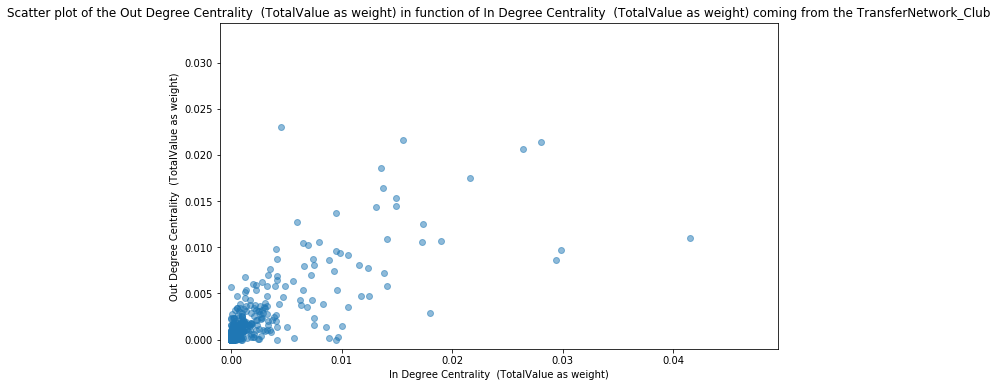

The Pearson Correlation coefficient (linear) for these two variable is 0.7938040089148484
The Spearman Correlation coefficient (monotonic) for these two variable is 0.7391550210142882


In [19]:
in_degree_scores = []
out_degree_scores = []

for node in TransferNetwork_Club.nodes():
    # We just put in a list the values of in and outer degree for each node
    in_degree_scores.append(centrality_measure['in_degree_centrality_total_value_weight'][node])
    out_degree_scores.append(centrality_measure['out_degree_centrality_total_value_weight'][node])
    
# Creation of the scatter plot
ScatterPlot(in_degree_scores,"In Degree Centrality  (TotalValue as weight)", out_degree_scores, "Out Degree Centrality  (TotalValue as weight)")

### 1.6
**What does the plot created in the previous question tell you? Specifically, what does a node's position in the scatter relative to the line x=y tell you?**

The plot created in the previous question tells us that the **big majority of the points are located in the left bottom part of the graph.** It means that the majority of the node as an in and out degree centrality inferior to 0.01. 

In addition, **we detect some extreme values that look like outliers.** In fact, the righter value which has a in degree centrality more than 0.04 is isolated.

**More specifically, node's position in the scatter relative to the line x=y tell us that the two variables are linearly correlated.** Moreover, the Pearson correlation coefficient is illustrating this fact. 
This correlation means that nodes with a small in degree centrality will have a small out degree centrality and  nodes with a high in degree centrality will have a high out degree centrality.

This node's position in the scatter relative to the line x=y tell us a really clear fact : **the one who are below the line (higher in degree centrality) buy more than he sells in term of money** (if we were not looking at the weighted version, the frequency which means the number of players trade would be analyse). **In this case, the club loose money. If the point is above the line, the club sell more than he buys thus he win money.**

### 1.7
**Scatter plot in-degree centrality ("TotalValue" as weight) _vs_ PageRank ("TotalValue" as weight). **

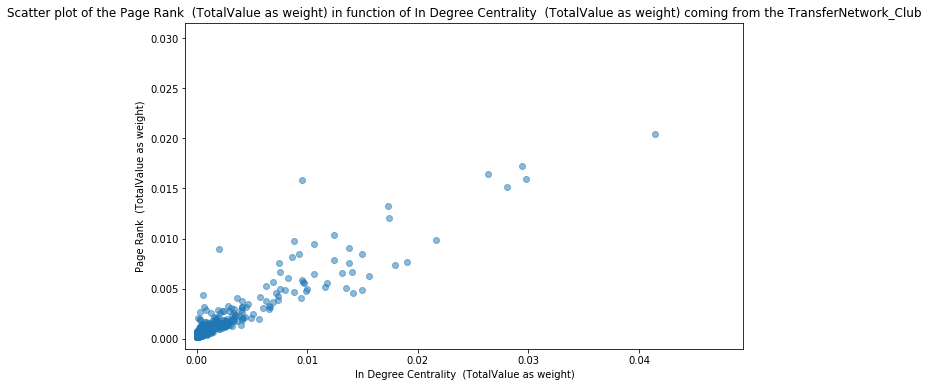

The Pearson Correlation coefficient (linear) for these two variable is 0.9402478074823832
The Spearman Correlation coefficient (monotonic) for these two variable is 0.9894181028625127


In [20]:
in_degree_scores = []
page_rank_scores = []

for node in TransferNetwork_Club.nodes():
    # We just put in a list the values of interest for each node
    in_degree_scores.append(centrality_measure['in_degree_centrality_total_value_weight'][node])
    page_rank_scores.append(centrality_measure['pagerank_totalvalue_weight'][node])

# Creation of the scatter plot
ScatterPlot(in_degree_scores,"In Degree Centrality  (TotalValue as weight)", page_rank_scores, "Page Rank  (TotalValue as weight)")

### 1.8
**How strong is the correlation between in-degree centrality and PageRank? Based on how PageRank is calculated, did you expect this relationship? How do you interpret the outliers of this relationship?**

**How strong is the correlation between in-degree centrality and PageRank?**

As you can see, the Pearson Correlation coefficient (linear) is 0.94 which is really high. **Thus we can say that these two variables are extremely linearly correlated.**
In addition, we also observe a Spearman Correlation coefficient (non-linear) of 0.99 which is extremely high. **The two variables are even more correlate in the sense of Spearman coefficient.** The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other. **Thus, the two variables are a nearly perfect monotone function of each other.**


**Based on how PageRank is calculated, did you expect this relationship?**

PageRank is an eigenvector centrality measure but it seeks the steady-state probability distribution for the likelihood that a walker randomly moving from node to node along links will be on anyone node at any point in time. **PageRank says a node is important when it is likely to be randomly walked to.** Thus, by definition, we expect this kind of relationship as a random walk is done thanks to edges and thus is inevitably linked to the in degree.


**How do you interpret the outliers of this relationship?**

**Outliers in this cases are the more connected nodes** in the graph corresponding to the ones with the higher in degree values and PageRanks values. **It means that these nodes are the more 'central' nodes.** In fact, a higher PageRank value means a higher probability of finding a walker at any given node.

----
## Problem 2
15 points.

In this problem we are going to continue exploring centrality measures in the context of the Club-to-Club transfer network, but with a twist.

1. Create a new network (call it Reversed_TransferNetwork_Club) that is the same as TransferNetwork_Club but with the direction of all the links reversed. _hint_: networkx has a built in function for this. [<span style="color:red">Technical</span>] [1]
2. In reversing the direction of the links in this network, how have we changed what a link means? In the original network, what would "flow" along a link? In the reversed, what now "flows" along a link? How do these changes alter how we may interpret the results of centrality analysis on the reversed network. [<span style="color:blue">Analytical</span>] [3]
3. Based on what you noted in the previous question, are there any centrality measures you feel are going to be especially sensitive to this difference? Are there any you think won't be affected at all? Justify your line of thought. [<span style="color:blue">Analytical</span>] [2]
4. For this reversed network, calculate all of the same centrality measures calculated in Question 1.1. [<span style="color:red">Technical</span>] [1]
5. For each of these measures print the Top 10 clubs according to the specifications outlined in Question 1.2. [<span style="color:red">Technical</span>] [1]
6. Make a scatter plot of PageRank ("TotalValue" as weight) in the original network _vs_ the same measure but in the reversed network. How strong is the correlation between these to measures? What does it mean if a club is an outlier well above the x=y line. What does it mean if an outlier well below that line. [<span style="color:blue">Analytical</span>] [2]
7. Make a scatter plot of Eigenvector centrality ("TotalValue" as weight) in the original network _vs_ the same measure in the reversed network. How strong is the correlation between these to measures? What does it mean if a club is an outlier well above the x=y line. What does it mean if an outlier well below that line. [<span style="color:blue">Analytical</span>] [2]
8. Take another centrality measure you calculated for both the original and reversed networks that you believe may be interesting to explore. Why did you choose this one? Scatter plot the original _vs_ reversed. Is there a strong correlation? What do outliers well above the line x=y imply. What do outliers well below that line imply. [<span style="color:blue">Analytical</span>] [3]

#### Problem 2 Marks

2.1) Null/1

2.2) Null/3

2.3) Null/2

2.4) Null/1

2.5) Null/1

2.6) Null/2

2.7) Null/2

2.8) Null/3

Total: Null/15

In [21]:
Problem2Score = None
Scores.append(Problem2Score)

----

### 2.1

**Create a new network (call it Reversed_TransferNetwork_Club) that is the same as TransferNetwork_Club but with the direction of all the links reversed. **

In [22]:
Reversed_TransferNetwork_Club = TransferNetwork_Club.reverse(copy=True)
# We see that information printed are the same as the not reversed version : it makes sense
print(nx.info(Reversed_TransferNetwork_Club))

Name: Transfers_CountryFiltered_EdgeFiltered_SCC
Type: DiGraph
Number of nodes: 1996
Number of edges: 9651
Average in degree:   4.8352
Average out degree:   4.8352


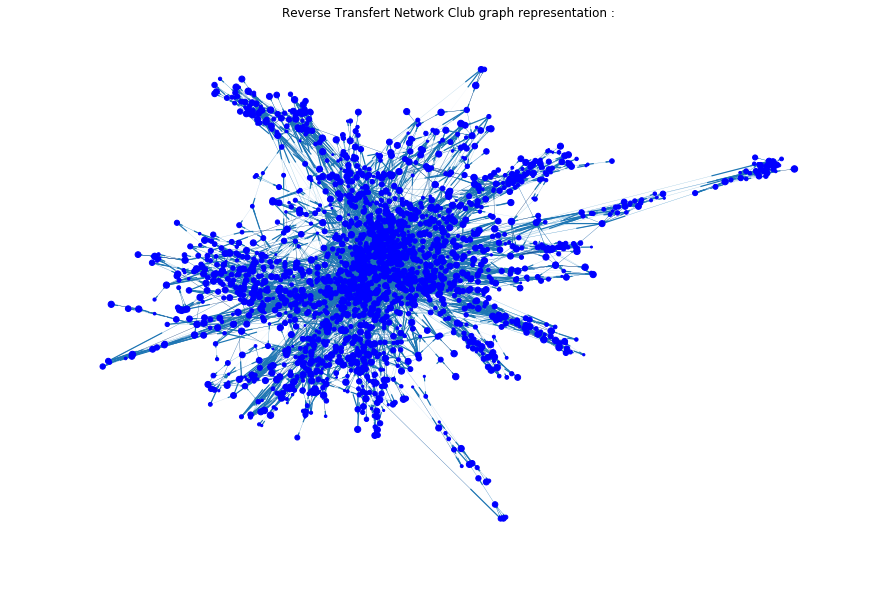

In [23]:
# Plot the graph
plt_directed(Reversed_TransferNetwork_Club, 'Reverse Transfert Network Club graph representation :')

### 2.2
**In reversing the direction of the links in this network, how have we changed what a link means? In the original network, what would "flow" along a link? In the reversed, what now "flows" along a link? How do these changes alter how we may interpret the results of centrality analysis on the reversed network.**


**How have we changed what a link means? In the original network, what would "flow" along a link? In the reversed, what now "flows" along a link?**

Before the reversing direction, the links point to the club receiving the player in a transaction. **Thus, the edges represented the 'players flow' in the original network**. Now the links are directed from the club that receives the player to the club that sells the player. In fact, the new directions of **the edges in the reversed graph represent the cash flow of the transfer and point to the club that receives the money.**

**How do these changes alter how we may interpret the results of centrality analysis on the reversed network.**

**In the original network, the results of centrality analysis gave insight to clubs that were receiving a player. Now, it will give more insights into clubs receiving money.** In fact, when we were weighted the original graph with the total value, we obtained in the Top10 the clubs which were the more active in term of receiving players. Now, when we weight with TotalValue, we will have information on clubs that receive money which is not the same. In addition, some centrality will not change or will be inverted. **At the end, the more important change is when we use the weighted version. Measure like closeness or Pagerank will change but not completly and scores will stay in the same order of magnitude.** For more details look at the following question.

### 2.3
**Based on what you noted in the previous question, are there any centrality measures you feel are going to be especially sensitive to this difference? Are there any you think won't be affected at all? Justify your line of thought.**

Some centrality measures are going to be **especially sensitive to this difference**. These are the following :
   * In and out-degree centrality.
   * In and out-degree centrality using "TotalValue" as the weight.

Some measure **will change but not a lot** :
   * Closeness centrality.
   * PageRank using "Number_nonFree" as the weight.
   * PageRank using "TotalValue" as the weight.
   * Eigenvector centrality.
   * Eigenvector centrality using "TotalValue" as the weight.
   
In addition, some measures **won't be affected at all**. These are the following :
   * Betweenness centrality.
   * Betweenness centrality using "Inverse_TotalValue" as the weight  (1Total value of transfers)(1Total value of transfers).


**In and out-degree centrality:**

**The in-degree centrality measure from the original graph should be the new inversed graph out-degree centrality.** The same can be applied for the new in degree measurement: the old out-degree centrality measure should be the new inversed graph in degree centrality. Thus, these degree centrality measures are really sensitive to the difference as they are completely different from the previous graph looking per category. **This process appears just because by switching the links directions we kind of switch the degree definition.**

**Betweenness centrality:**

This measure will not be affected at all by the change. In fact, **Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.** Betweenness Centrality says a node/edge is important when it lies on the shortest path between many pairs of nodes. **Inverted the graph is not changing the node implicated in the shortest path. In fact, if we consider one shortest path, the node implicate will stay the same but the direction of the path will change.** That's why this measure is not impacted. In our case, a node with a high betweenness centrality would be a club in the center of a lot of trading indicating a lot of selling and buying.

**Closeness and PageRank and Eigenvector centrality:**

In a connected graph, the **closeness centrality of a node is the average length of the shortest path between the node and all other nodes in the graph.** Thus, closeness centrality says a node is important when it has a short distance to get to all others. In this case, **as it takes into account all the others, the values of this measure will change but this will stay in the same order of magnitude. 
The same applies to the Eigenvector centrality and PageRank.** In fact, **eigenvector centrality is a measure of the influence of a node in a network.** It assigns relative scores to all nodes in the network **based on the concept that connections to high-scoring nodes contribute more to the score of the node** in question than equal connections to low-scoring nodes. In addition, **PageRank** is an eigenvector centrality measure but it **seeks the steady-state probability distribution for the likelihood that a walker randomly moving from node to node along links will be on anyone node at any point in time.** Thus the measure will change slightly.

### 2.4

**For this reversed network, calculate all of the same centrality measures calculated in Question 1.1. **

In [24]:
# To calculate in_degree_centrality using TotalValue as weight, we need to have the total sum of the TotalValues.
Reversed_tot_weight = 0
for i in Reversed_TransferNetwork_Club.nodes():
    for j in Reversed_TransferNetwork_Club.edge[i]:
        Reversed_tot_weight += Reversed_TransferNetwork_Club.edge[i][j]['TotalValue']

# Explanation about this way of finding the in and out degree centrality using "TotalValue" as the weight is descreibed below
Reversed_df_in_degree_weighted = Reversed_TransferNetwork_Club.in_degree(weight = 'TotalValue')
for i in Reversed_df_in_degree_weighted.keys():
    Reversed_df_in_degree_weighted[i] =  Reversed_df_in_degree_weighted[i]/Reversed_tot_weight
    
Reversed_df_out_degree_weighted = Reversed_TransferNetwork_Club.out_degree(weight = 'TotalValue')
for i in Reversed_df_out_degree_weighted.keys():
    Reversed_df_out_degree_weighted[i] =  Reversed_df_out_degree_weighted[i]/Reversed_tot_weight

In [25]:
reversed_centrality_measure = dict()
reversed_centrality_measure = {'in_degree_centrality': nx.in_degree_centrality(Reversed_TransferNetwork_Club), 
                      'out_degree_centrality': nx.out_degree_centrality(Reversed_TransferNetwork_Club),
                      'in_degree_centrality_total_value_weight': Reversed_df_in_degree_weighted, 
                      'out_degree_centrality_total_value_weight': Reversed_df_out_degree_weighted,
                      'closeness_centrality': nx.closeness_centrality(Reversed_TransferNetwork_Club),
                      'betweeness_centrality': nx.betweenness_centrality(Reversed_TransferNetwork_Club),
                      'betweeness_centrality_inverse_total_value_weight': nx.betweenness_centrality(Reversed_TransferNetwork_Club, weight= 'Inverse_TotalValue'),
                      'pagerank_numbre_nonfree_weight': nx.pagerank(Reversed_TransferNetwork_Club, weight= 'Number_nonFree'),
                      'pagerank_totalvalue_weight': nx.pagerank(Reversed_TransferNetwork_Club, weight= 'TotalValue'),
                      'eigenvector_centrality': nx.eigenvector_centrality(Reversed_TransferNetwork_Club),
                      'eigenvector_centrality_total_value_weight': nx.eigenvector_centrality(Reversed_TransferNetwork_Club, weight= 'TotalValue'),
                     }

### 2.5
**For each of these measures print the Top 10 clubs according to the specifications outlined in Question 1.2. **

In [26]:
print_the_best(ten_best_feature_per_measure(reversed_centrality_measure))


TOP 10 IN_DEGREE_CENTRALITY:
The best 10 clubs for the in_degree_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,in_degree_centrality
1,Juventus,Serie A,Italy,0.016040
2,Benfica,Liga NOS,Portugal,0.013033
3,Inter,Serie A,Italy,0.012531
4,Torino,Serie A,Italy,0.012030
5,TSG Hoffenheim,1.Bundesliga,Germany,0.012030
6,AS Roma,Serie A,Italy,0.011529
7,Man City,Premier League,England,0.011028
8,VfB Stuttgart,1.Bundesliga,Germany,0.011028
9,Chelsea,Premier League,England,0.010526
10,Sampdoria,Serie A,Italy,0.010526



TOP 10 OUT_DEGREE_CENTRALITY:
The best 10 clubs for the out_degree_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,out_degree_centrality
1,AS Roma,Serie A,Italy,0.014536
2,Olympiacos,Super League,Greece,0.014536
3,Juventus,Serie A,Italy,0.014035
4,Fiorentina,Serie A,Italy,0.013033
5,VfB Stuttgart,1.Bundesliga,Germany,0.013033
6,Aston Villa,Premier League,England,0.012531
7,Man City,Premier League,England,0.012531
8,VfL Wolfsburg,1.Bundesliga,Germany,0.012531
9,Watford,Championship,England,0.012030
10,Sampdoria,Serie A,Italy,0.012030



TOP 10 IN_DEGREE_CENTRALITY_TOTAL_VALUE_WEIGHT:
The best 10 clubs for the in_degree_centrality_total_value_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,in_degree_centrality_total_value_weight
1,Benfica,Liga NOS,Portugal,0.023055
2,Monaco,Ligue 1,Monaco,0.021613
3,Juventus,Serie A,Italy,0.021422
4,Chelsea,Premier League,England,0.020653
5,Bor. Dortmund,1.Bundesliga,Germany,0.018551
6,FC Barcelona,LaLiga,Spain,0.017480
7,AS Roma,Serie A,Italy,0.016466
8,Atlético Madrid,LaLiga,Spain,0.015368
9,Spurs,Premier League,England,0.014447
10,VfL Wolfsburg,1.Bundesliga,Germany,0.014336



TOP 10 OUT_DEGREE_CENTRALITY_TOTAL_VALUE_WEIGHT:
The best 10 clubs for the out_degree_centrality_total_value_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,out_degree_centrality_total_value_weight
1,Man City,Premier League,England,0.041451
2,Man Utd,Premier League,England,0.029816
3,Paris SG,Ligue 1,France,0.029421
4,Juventus,Serie A,Italy,0.028029
5,Chelsea,Premier League,England,0.026383
6,FC Barcelona,LaLiga,Spain,0.021607
7,Inter,Serie A,Italy,0.018982
8,AC Milan,Serie A,Italy,0.017950
9,Liverpool,Premier League,England,0.017362
10,Everton,Premier League,England,0.017302



TOP 10 CLOSENESS_CENTRALITY:
The best 10 clubs for the closeness_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,closeness_centrality
1,AS Roma,Serie A,Italy,0.237982
2,Olympiacos,Super League,Greece,0.237528
3,Watford,Championship,England,0.237387
4,Inter,Serie A,Italy,0.236739
5,Sporting CP,Liga NOS,Portugal,0.235593
6,Leicester,Premier League,England,0.233607
7,Udinese Calcio,Serie A,Italy,0.233443
8,Sampdoria,Serie A,Italy,0.233388
9,Real Betis,LaLiga2,Spain,0.233170
10,Man City,Premier League,England,0.232490



TOP 10 BETWEENESS_CENTRALITY:
The best 10 clubs for the betweeness_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,betweeness_centrality
1,Torino,Serie A,Italy,0.057933
2,Olympiacos,Super League,Greece,0.047792
3,Juventus,Serie A,Italy,0.042491
4,Dinamo Zagreb,1.HNL,Croatia,0.041655
5,Sporting CP,Liga NOS,Portugal,0.035951
6,Red Star,SuperLiga,Serbia,0.035089
7,Partizan,SuperLiga,Serbia,0.034657
8,AS Roma,Serie A,Italy,0.033959
9,Catania,Serie B,Italy,0.031304
10,Inter,Serie A,Italy,0.029005



TOP 10 BETWEENESS_CENTRALITY_INVERSE_TOTAL_VALUE_WEIGHT:
The best 10 clubs for the betweeness_centrality_inverse_total_value_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,betweeness_centrality_inverse_total_value_weight
1,Chelsea,Premier League,England,0.245758
2,Juventus,Serie A,Italy,0.205333
3,Man City,Premier League,England,0.185111
4,Paris SG,Ligue 1,France,0.181444
5,Atlético Madrid,LaLiga,Spain,0.125347
6,VfL Wolfsburg,1.Bundesliga,Germany,0.121791
7,FC Porto,Liga NOS,Portugal,0.119135
8,Inter,Serie A,Italy,0.108057
9,Man Utd,Premier League,England,0.107915
10,FC Barcelona,LaLiga,Spain,0.102842



TOP 10 PAGERANK_NUMBRE_NONFREE_WEIGHT:
The best 10 clubs for the pagerank_numbre_nonfree_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,pagerank_numbre_nonfree_weight
1,Juventus,Serie A,Italy,0.003913
2,Inter,Serie A,Italy,0.003311
3,FC Sion,Super League,Switzerland,0.003176
4,Boca Juniors,Primera División,Argentina,0.002846
5,Olimpo,Primera División,Argentina,0.002753
6,Boavista,Liga NOS,Portugal,0.002705
7,VfB Stuttgart,1.Bundesliga,Germany,0.002609
8,TSG Hoffenheim,1.Bundesliga,Germany,0.002488
9,Benfica,Liga NOS,Portugal,0.002468
10,Feirense,Ledman Liga Pro,Portugal,0.002346



TOP 10 PAGERANK_TOTALVALUE_WEIGHT:
The best 10 clubs for the pagerank_totalvalue_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,pagerank_totalvalue_weight
1,Inter,Serie A,Italy,0.005778
2,Juventus,Serie A,Italy,0.005358
3,Benfica,Liga NOS,Portugal,0.004241
4,Atlético Madrid,LaLiga,Spain,0.004003
5,FC Porto,Liga NOS,Portugal,0.003752
6,Boca Juniors,Primera División,Argentina,0.003419
7,São Paulo,Série A,Brazil,0.003348
8,Udinese Calcio,Serie A,Italy,0.003170
9,AS Roma,Serie A,Italy,0.003074
10,Monaco,Ligue 1,Monaco,0.003068



TOP 10 EIGENVECTOR_CENTRALITY:
The best 10 clubs for the eigenvector_centrality are the following : 



,Club_Name,Club_League,Club_LeagueNation,eigenvector_centrality
1,Inter,Serie A,Italy,0.170392
2,Torino,Serie A,Italy,0.165936
3,AS Roma,Serie A,Italy,0.160602
4,Sampdoria,Serie A,Italy,0.157319
5,Juventus,Serie A,Italy,0.151589
6,Chelsea,Premier League,England,0.136013
7,Benfica,Liga NOS,Portugal,0.133526
8,Atlético Madrid,LaLiga,Spain,0.126647
9,TSG Hoffenheim,1.Bundesliga,Germany,0.126527
10,Monaco,Ligue 1,Monaco,0.126214



TOP 10 EIGENVECTOR_CENTRALITY_TOTAL_VALUE_WEIGHT:
The best 10 clubs for the eigenvector_centrality_total_value_weight are the following : 



,Club_Name,Club_League,Club_LeagueNation,eigenvector_centrality_total_value_weight
1,Benfica,Liga NOS,Portugal,0.346680
2,Monaco,Ligue 1,Monaco,0.280217
3,Bor. Dortmund,1.Bundesliga,Germany,0.278297
4,Atlético Madrid,LaLiga,Spain,0.238478
5,FC Barcelona,LaLiga,Spain,0.230792
6,Sevilla FC,LaLiga,Spain,0.201322
7,VfL Wolfsburg,1.Bundesliga,Germany,0.181354
8,Juventus,Serie A,Italy,0.180879
9,Fiorentina,Serie A,Italy,0.170741
10,Chelsea,Premier League,England,0.168571


### 2.6
**Make a scatter plot of PageRank ("TotalValue" as weight) in the original network _vs_ the same measure but in the reversed network. **

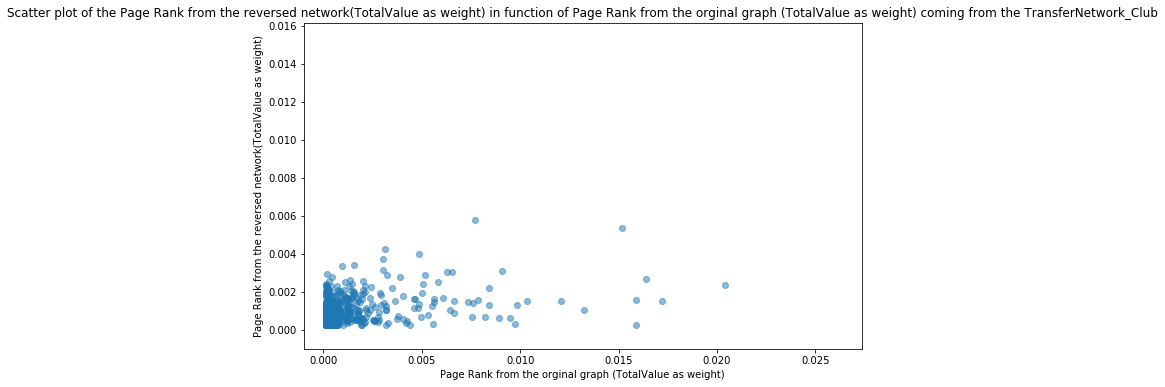

The Pearson Correlation coefficient (linear) for these two variable is 0.469037247504517
The Spearman Correlation coefficient (monotonic) for these two variable is 0.6440962355518309


In [27]:
page_rank_scores = []
reversed_page_rank_scores = []

for node in TransferNetwork_Club.nodes():
    page_rank_scores.append(centrality_measure['pagerank_totalvalue_weight'][node])
    reversed_page_rank_scores.append(reversed_centrality_measure['pagerank_totalvalue_weight'][node])
    
ScatterPlot(page_rank_scores,"Page Rank from the orginal graph (TotalValue as weight)", reversed_page_rank_scores, "Page Rank from the reversed network(TotalValue as weight)")

**How strong is the correlation between these measures? What does it mean if a club is an outlier well above the x=y line? What does it mean if an outlier well below that line.**


**How strong is the correlation between these to measures?**

As you can see, the Pearson Correlation coefficient (linear) is 0.47 which is an intermediate value. Thus we can say that these two variables are a little bit linearly correlated. In addition, we also observe a Spearman Correlation coefficient (monotonic) of 0.64 which is also an intermediate value. Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other. **Thus, thanks to these correlation measurements, we can say that a relationship between these two variables exist but this relation is not obvious.**

**What does it mean if a club is an outlier well above the x=y line ?**

It would mean that **this outlier have a higher PageRank coefficient in the reversed graph compare to the previous normal graph.** It would mean that this club is more important when we take into account the cash flow in it compare to the player flow.

**What does it mean if an outlier well below that line.**

It would mean that **this outlier have a lower PageRank coefficient in the reversed graph compare to the previous normal graph.** It would mean that this club is more important when we take into account the player flow in it compare to the cash flow.

We can see that most point have a higher page rank ratio in the original graph compare in the new reversed graph. It means that the PageRank algorithm is giving better score when we take into account the players flow.

### 2.7
**Make a scatter plot of Eigenvector centrality ("TotalValue" as weight) in the original network _vs_ the same measure in the reversed network.**

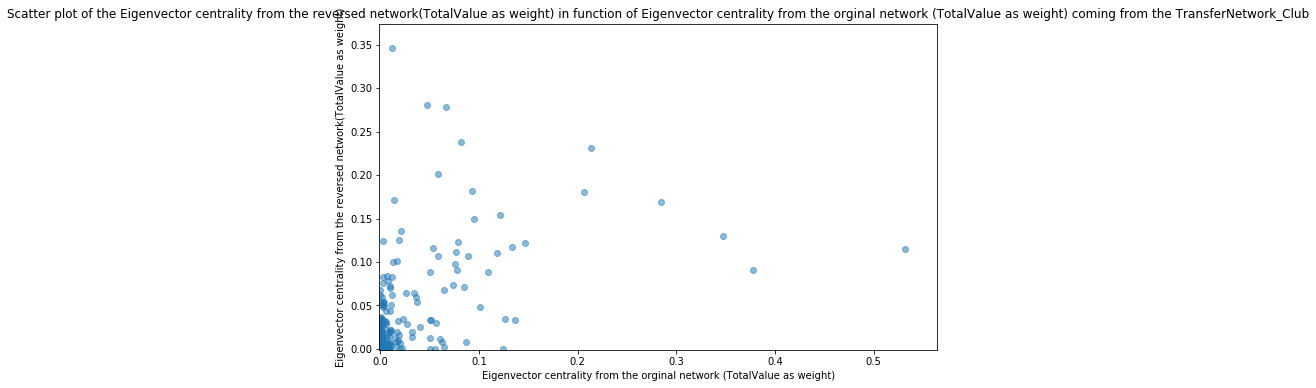

The Pearson Correlation coefficient (linear) for these two variable is 0.5696725089507296
The Spearman Correlation coefficient (monotonic) for these two variable is 0.6597927105317671


In [28]:
eigenvector_centrality_scores = []
reversed_eigenvector_centrality_scores = []

for node in TransferNetwork_Club.nodes():
    eigenvector_centrality_scores.append(centrality_measure['eigenvector_centrality_total_value_weight'][node])
    reversed_eigenvector_centrality_scores.append(reversed_centrality_measure['eigenvector_centrality_total_value_weight'][node])
    
ScatterPlot(eigenvector_centrality_scores,"Eigenvector centrality from the orginal network (TotalValue as weight)", reversed_eigenvector_centrality_scores, "Eigenvector centrality from the reversed network(TotalValue as weight)")

**How strong is the correlation between these to measures? What does it mean if a club is an outlier well above the x=y line. What does it mean if an outlier well below that line.**

**How strong is the correlation between these to measures?**

As you can see, the Pearson Correlation coefficient (linear) is 0.57 which is an intermediate value. It means that this linear relation exists but she is not well defined. Thus we can say that these two variables are a bit linearly correlated. In addition, we also observe a Spearman Correlation coefficient (monotonic) of 0.66 which is an intermediate value. **Thus, thanks to these correlation measurements, we can say that a relation between this two variables exist but this relation is not obvious. We can add that the eigenvector centrality scores are more lineary correlated compare to PageRank score.**

**What does it mean if a club is an outlier well above the x=y line ?** 

It would mean that **this outlier have an higher EigenVector coefficient in the reversed graph compare to the previous normal graph.** It would mean that this club is more important when we take into account the cash flow in it compare to the player flow.

**What does it mean if an outlier well below that line.** 

It would mean that **this outlier have an lower EigenVector coefficient in the inverted graph compare to the previous normal graph.** It would mean that this club is more important when we take into account the player flow in it compare to the cash flow.

We can see that most point have a higher EigenVector coefficient in the reversed graph compare in the old original graph. It means that the EigenVector algorithm is giving better score when we take into account the cash flow. In this way, the two measures (EigenVector and PageRank) are diffent and is an illustration of the different result obtain with different graph.


### 2.8
**Take another centrality measure you calculated for both the original and reversed networks that you believe may be interesting to explore.** 

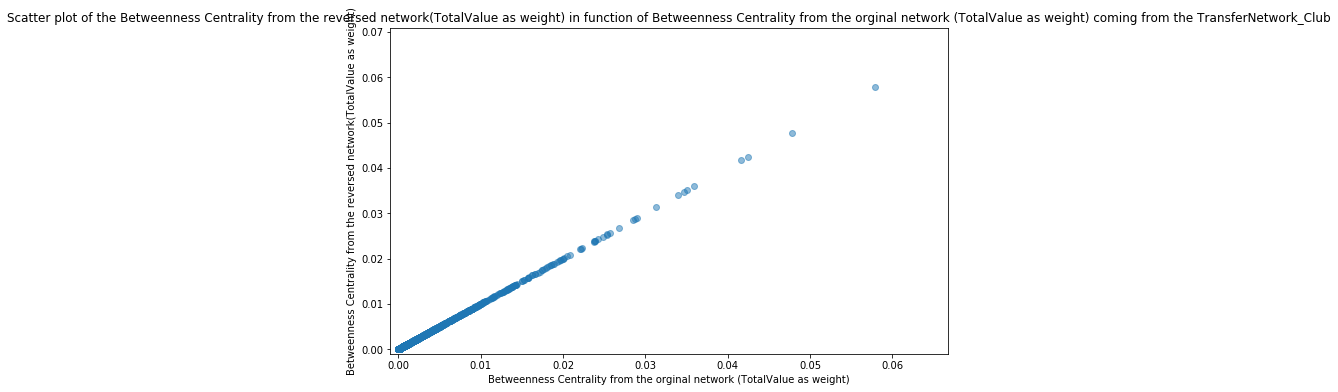

The Pearson Correlation coefficient (linear) for these two variable is 1.0
The Spearman Correlation coefficient (monotonic) for these two variable is 0.9999998976566559


In [29]:
betweenness_centrality_scores = []
reversed_betweenness_centrality_scores = []

for node in TransferNetwork_Club.nodes():
    betweenness_centrality_scores.append(centrality_measure['betweeness_centrality'][node])
    reversed_betweenness_centrality_scores.append(reversed_centrality_measure['betweeness_centrality'][node])
    
ScatterPlot(betweenness_centrality_scores,"Betweenness Centrality from the orginal network (TotalValue as weight)", reversed_betweenness_centrality_scores, "Betweenness Centrality from the reversed network(TotalValue as weight)")

**Why did you choose this one? Scatter plot the original _vs_ reversed. Is there a strong correlation? What do outliers well above the line x=y imply? What do outliers well below that line imply.**

**Why did you choose this one?**

We choose this measure because, in question 2, we answer that the betweenness measure won't be affected at all. Thus, **we want to check if this assumption made according to the measurement calculation definition was right.**

**Is there a strong correlation?**

As you can see, the Pearson Correlation coefficient (linear) is 1 which is a perfect linear correlation. **It means that this linear relation exists, that she is strong and that she is well defined. Thus we can say that these two variables are extremely linearly correlated.** In addition, we also observe a Spearman Correlation coefficient (monotonic) of 1 which is a high value. Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other. **Thus, thanks to these correlation measurements, we can say that a linear relationship between these two variables exists and this relation is extremely strong. This means that the betweenness measure stays the same in the original graph and in the reversed one. Thus our assumption was right.**

**What does it mean if a club is an outlier well above the x=y line ?** 

It would mean that this outlier has a **higher Betweenness Centrality coefficient in the reversed graph compare to the previous normal graph.** As Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes, it would mean that this club is more important when we take into account the cash flow in it compare to the player flow.

**What does it mean if an outlier well below that line?** 

It would mean that this outlier has a lower Betweenness coefficient in the inverted graph compare to the previous normal graph. It would mean that this club is more important when we take into account the player flow in it compare to the cash flow.


**We see in all the previous analysis that all correlation are positive, which is the case in social network. This implies that high degree nodes tend to connect to other high degree nodes, low degree nodes to low degree nodes.**


----
## Problem 3
10 points.

In this problem we will calculate some quantities relevant to estimating the level of homophily present in the football transfer market using the __undirected version__ of the club level transfer network. This calculation is similar to that shown in Slides 35 and 36 of Lecture 4. This calculation is not the most straightforward so take care in organizing your data structures.

To do this we will break clubs down according to nation of origin. To avoid dealing with all 50+ nations in the network we will focus on the following:

>England, Italy, Germany, Spain, France, China, Portugal, Brazil

 and will group all other nations under an "Other" category.

1. Calculate the percentage of nodes that belong to each of the focus nations (and the "Other" category). [<span style="color:red">Technical</span>] [1]
2. Calculate the total number of links that nodes of each nation participate in. _hint_: sum the degrees of all the nodes of each nation (don't forget "Other"). [<span style="color:red">Technical</span>] [1]
3. For each of the focus nations, calculate the number of links to clubs of the other categories. _i.e._ you should end up with a data structure that tells you the number of links between clubs from England and Spain, Italy and Brazil, France and Other, _etc._ [<span style="color:red">Technical</span>] [3]
4. Divide the link counts calculated in the previous step by the link counts calculated in question 2. What you will get here is, for example, the percentage of links of "English" nodes (clubs) that go to "Italian" nodes (clubs). [<span style="color:red">Technical</span>] [1]
5. Print your results in the format:

| Nation 1 | Nation 2 | % of Nation 1 links going to Nation 2 (Step 4.) | % of nodes that belong to Nation 2 (Step 1) | Ratio of Column 3 divided by Column 4 |
|:--------:|:--------:|:-----------------------------------------------:|:-------------------------------------------:|:-------------------------------------:|
|England   |England          |0.60                                                 |0.15                                             |4.0                                       |
|Other          |Italy          |0.05                                                 |0.20                                             |0.25                                       |
|...          |...          |...                                                 |...                                             |...                                       ||

_Note_: It is not necessary you put your results in a markdown table, a formatted print is sufficient but do take some care to format the it nicely. [<span style="color:red">Technical</span>] [1]


6.) What patterns do you observe in these results. For example, which nations are the most homophilic? Which are the least? Which pairs of nations appear to have unusually strong relations? Which appear to have unusually weak relations? [<span style="color:blue">Analytical</span>] [3]

#### Problem 3 Grades

3.1) None/1

3.2) None/1

3.3) None/3

3.4) None/1

3.5) None/1

3.6) None/3

Total: None/10

In [30]:
Problem3Score = None

In [31]:
# Focus on these nations (don't forget an "Other" category too).
FocusCountries = ['England','Italy','Germany','Spain','France','China','Portugal','Brazil']

# Use the undirected version of the network for this one.
Undirected_TransferNetwork_Club = TransferNetwork_Club.to_undirected()

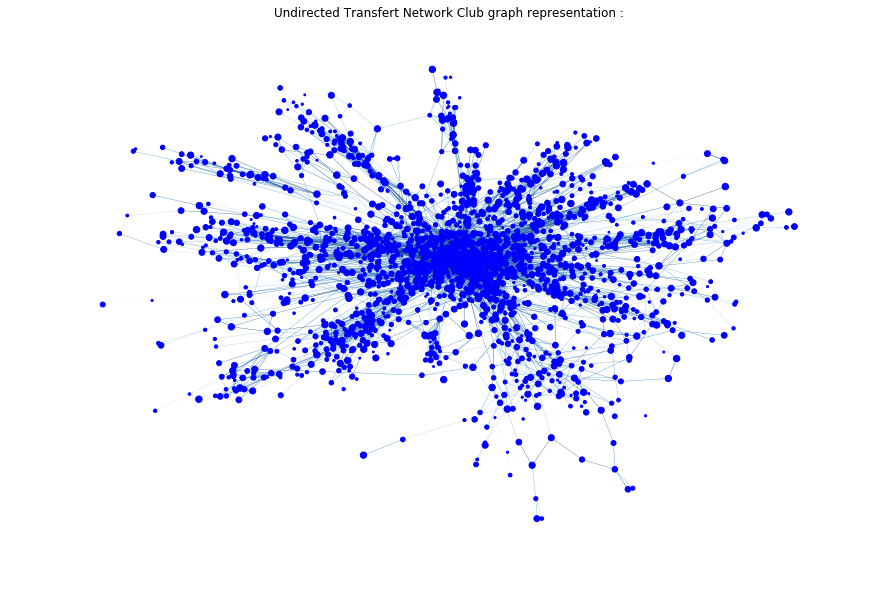

In [32]:
# Plot the graph
plt_directed(Undirected_TransferNetwork_Club, 'Undirected Transfert Network Club graph representation :')

In [33]:
# Print basic informations on this new graph
print(nx.info(Undirected_TransferNetwork_Club))

Name: Transfers_CountryFiltered_EdgeFiltered_SCC
Type: Graph
Number of nodes: 1996
Number of edges: 7427
Average degree:   7.4419


----

### 3.1
**Calculate the percentage of nodes that belong to each of the focus nations (and the "Other" category).**

In [34]:
# Creation of the dataframe containing the information of each nodes. Each line correspond to a node.
df = pd.DataFrame.from_dict(dict(Undirected_TransferNetwork_Club.nodes(data=True)), orient='index')

# We iterate on the dataframe containing information of the nation and we create the 'Other' category.
list_country = []
for i in df['Club_LeagueNation']:
    if i in FocusCountries:
        list_country.append(i)
    else :
        list_country.append('Other')

# We replace the feature with the new created list containing the categroy 'Other'
df['Club_LeagueNation'] = list_country
df['Count'] = 1

# We groupby all the nodes having the same nation and we sum the count feature to have the number of node per nation
df_percentage = df.groupby('Club_LeagueNation').sum()
df_percentage['percentage'] = df_percentage['Count']/df_percentage['Count'].sum()
display(HTML(df_percentage.to_html()))

,Count,percentage
Club_LeagueNation,,
Brazil,84,0.042084
China,39,0.019539
England,126,0.063126
France,51,0.025551
Germany,107,0.053607
Italy,231,0.115731
Other,1145,0.573647
Portugal,52,0.026052
Spain,161,0.080661


In [35]:
# We check if the sum of the count feature is the total number of node in the graph and if the sum of the percentage is 1
df_percentage.sum()

Count         1996.0
percentage       1.0
dtype: float64

### 3.2
**Calculate the total number of links that nodes of each nation participate in. hint: sum the degrees of all the nodes of each nation (don't forget "Other")**

In [36]:
degree_list=[]
# We store the dictionary containing as key the id of the node and as value the degree of the node
degree = nx.degree(Undirected_TransferNetwork_Club)

# We iterate on all the node of the graph with df.index and we add the degree feature in the overall dataframe
for i in df.index:
    degree_list.append(degree[i])
df['Degree'] = degree_list

# We do the same process as before but this time we are not interesting in summing the count column made with 1 but the degree column
df_nb_link = df.groupby('Club_LeagueNation').sum()
df_nb_link.rename(columns = {'Degree':'Degree_Sum'}, inplace = True)
display(HTML(df_nb_link.to_html()))

,Count,Degree_Sum
Club_LeagueNation,,
Brazil,84,608
China,39,387
England,126,1373
France,51,526
Germany,107,1046
Italy,231,1513
Other,1145,7804
Portugal,52,389
Spain,161,1208


In [37]:
# We check if the sum of the count feature is the total number of node in the graph 
# and if the sum of the degree_sum feature is two times the total number of edge in the graph (as we are in a undirected situation)
df_nb_link.sum() 

Count          1996
Degree_Sum    14854
dtype: int64

### 3.3

**For each of the focus nations, calculate the number of links to clubs of the other categories. i.e. you should end up with a data structure that tells you the number of links between clubs from England and Spain, Italy and Brazil, France and Other, etc. **

In [38]:
# Creation of the dataframe containing the information of each edge. Each line correspond to an edge.
df_edges= pd.DataFrame.from_dict(Undirected_TransferNetwork_Club.edges()).rename(columns = {0:'index', 1:'Target_node'}).set_index('index')

# We add to the list of Focus Countries, the category called Other as we want to take it into account
list_category = FocusCountries
list_category.append('Other')

# We create the dataframe were the result will be store and we fill it with 0.
df_out = pd.DataFrame(index = df.index, columns = list_category).fillna(0)

for idx_source in df_out.index: # Here we iterate on each node of the graph
    if idx_source in df_edges.index : # We check if the id of the node taking into account has edges as source node
        df_tmp = df_edges.loc[idx_source] # We select the different edges with the node id corresponding to the source node
        if df_tmp.shape[0] > 1 : # This condition check if there are several edges going out of this source node
            for idx_target in df_tmp['Target_node']: # We iterate on the several edges taking into account the id of the target node
                country_target = df.loc[idx_target]['Club_LeagueNation'] # We find the country of the target node
                df_out.loc[idx_source][country_target] += 1 # We add one to the corresponding category in the output dataframe
                country_source = df.loc[idx_source]['Club_LeagueNation'] # We do the same for the target node coming from the edge taking into account
                df_out.loc[idx_target][country_source] += 1 
        elif df_tmp.shape[0] == 1 : # This condition check if there is just one edge going out of this source node and we do the same as before
            country_target = df.loc[df_tmp['Target_node']]['Club_LeagueNation']
            df_out.loc[idx_source][country_target] += 1 
            country_source = df.loc[idx_source]['Club_LeagueNation']
            df_out.loc[df_tmp['Target_node']][country_source] += 1 
            
# We add to the output dataframe the feature containing the nation of each node to allow a groupby
df_out = pd.merge(df[['Club_LeagueNation']], df_out, left_index=True, right_index=True).rename(columns = {'Club_LeagueNation':'nation_source'})
df_out = df_out.groupby('nation_source').sum()
df_out = df_out[df_out.index]
display(HTML(df_out.to_html()))

,Brazil,China,England,France,Germany,Italy,Other,Portugal,Spain
nation_source,,,,,,,,,
Brazil,442,16,6,6,9,19,83,18,9
China,16,252,7,3,7,5,76,12,9
England,6,7,902,47,57,46,225,27,56
France,6,3,47,280,24,14,117,16,19
Germany,9,7,57,24,722,21,177,6,23
Italy,19,5,46,14,21,1186,173,11,38
Other,83,76,225,117,177,173,6756,86,111
Portugal,18,12,27,16,6,11,86,192,21
Spain,9,9,56,19,23,38,111,21,922


In [39]:
print(f'To verify the answer, we check that the number total of edges should be the same as the one print in graph info times 2: {df_out.sum().sum()}')
print(f'This is the case.')

To verify the answer, we check that the number total of edges should be the same as the one print in graph info times 2: 14854
This is the case.


In [40]:
print('Here we verify if the output of the sum of our output dataframe is the sane as for question 2 :\n')
print(df_out.sum(), '\n')
print(df_out.sum(axis = 1))

Here we verify if the output of the sum of our output dataframe is the sane as for question 2 :

Brazil       608
China        387
England     1373
France       526
Germany     1046
Italy       1513
Other       7804
Portugal     389
Spain       1208
dtype: int64 

nation_source
Brazil       608
China        387
England     1373
France       526
Germany     1046
Italy       1513
Other       7804
Portugal     389
Spain       1208
dtype: int64


### 3.4

**Divide the link counts calculated in the previous step by the link counts calculated in question 2. What you will get here is, for example, the percentage of links of "English" nodes (clubs) that go to "Italian" nodes (clubs).**

In [41]:
df_out_percentage = df_out.copy() # We make a copy of the out dataset to create the one where we will store the percentage
for i in df_nb_link.index:
    df_out_percentage.loc[i] /= df_nb_link.loc[i]['Degree_Sum'] # We the dataframe previously calculated in question 2
display(HTML(df_out_percentage.to_html()))

,Brazil,China,England,France,Germany,Italy,Other,Portugal,Spain
nation_source,,,,,,,,,
Brazil,0.726974,0.026316,0.009868,0.009868,0.014803,0.031250,0.136513,0.029605,0.014803
China,0.041344,0.651163,0.018088,0.007752,0.018088,0.012920,0.196382,0.031008,0.023256
England,0.004370,0.005098,0.656956,0.034232,0.041515,0.033503,0.163875,0.019665,0.040787
France,0.011407,0.005703,0.089354,0.532319,0.045627,0.026616,0.222433,0.030418,0.036122
Germany,0.008604,0.006692,0.054493,0.022945,0.690249,0.020076,0.169216,0.005736,0.021989
Italy,0.012558,0.003305,0.030403,0.009253,0.013880,0.783873,0.114342,0.007270,0.025116
Other,0.010636,0.009739,0.028831,0.014992,0.022681,0.022168,0.865710,0.011020,0.014223
Portugal,0.046272,0.030848,0.069409,0.041131,0.015424,0.028278,0.221080,0.493573,0.053985
Spain,0.007450,0.007450,0.046358,0.015728,0.019040,0.031457,0.091887,0.017384,0.763245


### 3.5

**Print your results in the format:**

| Nation 1 | Nation 2 | % of Nation 1 links going to Nation 2 (Step 4.) | % of nodes that belong to Nation 2 (Step 1) | Ratio of Column 3 divided by Column 4 |
|:--------:|:--------:|:-----------------------------------------------:|:-------------------------------------------:|:-------------------------------------:|
|England   |England          |0.60                                                 |0.15                                             |4.0                                       |
|Other          |Italy          |0.05                                                 |0.20                                             |0.25                                       |
|...          |...          |...                                                 |...                                             |...                                       ||

**_Note_: It is not necessary you put your results in a markdown table, a formatted print is sufficient but do take some care to format the it nicely.**

In [42]:
import numpy as np
list_nation_1, list_nation_2, percentage_list, nodes_list  = [], [], [], [] # these list will be used to create our new features
for i in df_out_percentage.index:
    for j in df_out_percentage.columns:
        list_nation_1.append(i) # the index of the df_out_percentage is the source nation
        list_nation_2.append(j) # the index of the df_out_percentage is the target nation
        percentage_list.append(df_out_percentage.loc[i][j]) # we select the corresponding value for the first feature
        nodes_list.append(df_percentage.loc[j]['percentage']) # we use the dataframe create in question 1 to fill up this feature

# We create the returned dataframe and we fill up the features
df_resume = pd.DataFrame(columns = ['Nation_1', 'Nation_2', '%_of_Nation_1_links_going_to_Nation_2', '%_of_nodes_that_belong_to_Nation_2', 'Ratio_of_the_two_previous_columns'])
df_resume['Nation_1'] = list_nation_1
df_resume['Nation_2'] = list_nation_2
df_resume['%_of_Nation_1_links_going_to_Nation_2'] = percentage_list
df_resume['%_of_nodes_that_belong_to_Nation_2'] = nodes_list 
df_resume['Ratio_of_the_two_previous_columns'] =  df_resume['%_of_Nation_1_links_going_to_Nation_2'] / df_resume['%_of_nodes_that_belong_to_Nation_2']
display(HTML(df_resume.to_html()))

,Nation_1,Nation_2,%_of_Nation_1_links_going_to_Nation_2,%_of_nodes_that_belong_to_Nation_2,Ratio_of_the_two_previous_columns
0,Brazil,Brazil,0.726974,0.042084,17.274279
1,Brazil,China,0.026316,0.019539,1.346829
2,Brazil,England,0.009868,0.063126,0.156328
3,Brazil,France,0.009868,0.025551,0.386223
4,Brazil,Germany,0.014803,0.053607,0.276131
5,Brazil,Italy,0.031250,0.115731,0.270022
6,Brazil,Other,0.136513,0.573647,0.237974
7,Brazil,Portugal,0.029605,0.026052,1.136387
8,Brazil,Spain,0.014803,0.080661,0.183516
9,China,Brazil,0.041344,0.042084,0.982404


### 3.6

**What patterns do you observe in these results. For example, which nations are the most homophilic? Which are the least? Which pairs of nations appear to have unusually strong relations? Which appear to have unusually weak relations?**

**Homophily is the tendency of individuals to associate and bond with similar others, as in the proverb "birds of a feather flock together".** The presence of homophily has been discovered in a vast array of network studies. More than 100 studies that have observed homophily in some form or another and they establish that similarity breeds connection. These include age, gender, class, and organizational role.

Individuals in homophilic relationships share common characteristics (beliefs, values, education, etc.) that make communication and relationship formation easier. The opposite of homophily is heterophily or intermingling.

**Which nations are the most homophilic?**

**In our network case, we are able to observe high Homophily between clubs from the same nation. Thus, it's a country belonging homophily.** In fact, we can see in the table above and in the question 4 (by looking at the diagonal of the output dataframe) that **proportion of links linking clubs from the same country is extremly high compare to link pointing to foreign country.** This is really visible in the previous table thanks to the feature ratio of percentage_of_Nation_1_links_going_to_Nation_2 divide by percentage_of_nodes_that_belong_to_Nation_2 where the values for the same country are more than 10 times higher (even 100 times higher for some.) compare to values for different countries.

**Which are the least? Which pairs of nations appear to have unusually weak relations?**

**It's difficult to define the least ones, as the majority (with some exceptions) of the proportion of link linking clubs from different countries is low.** In fact, none of the relation can be characterized as the least homophilic one or more than 50 percent can be characterized like this. Thus, we can't identify very low values. 
We could also make the hypothesis that clubs from the best championship (let's say England, Spain, Germany, France) would have high relation that for the country with a low level championship like Portugal. This is more or less the case in our results but the order of magnitude stay similar.

**Which pairs of nations appear to have unusually strong relations?**

As we said before, the strong relations comes from the links between two clubs of the same country.

----
## Problem 4
10 points.

In this problem we will fit the degree distribution of three "fat-tailed" networks:
- web-NotreDame.txt
- web-Stanford.txt
- email-EuAll.txt.


1. First load the powerlaw package and print its version. Install it if you have not already. _Note_: documentation [here](http://pythonhosted.org/powerlaw/). [<span style="color:red">Technical</span>] [1]
2. Load each network and find (and create a subgraph for) the Strongly Connected Component. _hint_: they are all in edgelist format. [<span style="color:red">Technical</span>] [1]
3. Fit the web-NotreDame Strongly Connected Component's in-degree distribution and then plot (in the same figure) the data, the fitted powerlaw, and the fitted exponential, using the plot_ccdf function. Based on visual inspection, which is a better fit, exponential or powerlaw?  [<span style="color:red">Technical</span>] [2]
4. Fit the web-Stanford Strongly Connected Component's in-degree distribution and then plot (in the same figure) the data, the fitted powerlaw, and the fitted exponential, using the plot_ccdf function. Using the distribution_compare function which distribution is a better fit? Does this match what you see in the figure? What is the powerlaw exponent?  [<span style="color:red">Technical</span>] [3]
5. Fit the email-EuAll Strongly Connected Component's in-degree distribution and then use the distribution_compare function to determine which of powerlaw, lognormal, or exponential is the best fit. Using the plot_ccdf, function plot the two best fit distributions on the same plot. [<span style="color:red">Technical</span>] [3]

#### Problem 4 Grades

4.1) None/1

4.2) None/1

4.3) None/2

4.4) None/3

4.5) None/3

Total: None/10

In [43]:
Problem4Score = None

### 4.1
**First load the powerlaw package and print its version. Install it if you have not already. **

In [44]:
!pip install powerlaw

In [4]:
import community
print('The version of the powerlaw library is :', community.__version__)

The version of the powerlaw library is : 0.11


### 4.2
**Load each network and find (and create a subgraph for) the Strongly Connected Component. hint: they are all in edgelist format.**

In [46]:
# Load the graph and find for each the strongly connected component
G_dame = max(nx.strongly_connected_component_subgraphs(nx.read_edgelist('./web-NotreDame.txt', create_using=nx.DiGraph(), nodetype=int)), key=len)
G_stanford = max(nx.strongly_connected_component_subgraphs(nx.read_edgelist('./web-Stanford.txt', create_using=nx.DiGraph(), nodetype=int)), key=len)
G_email = max(nx.strongly_connected_component_subgraphs(nx.read_edgelist('./email-EuAll.txt', create_using=nx.DiGraph(), nodetype=int)), key=len)

In [47]:
print('\nInfo about the SCC of G_dame :')
print(nx.info(G_dame))
print('\nInfo about the SCC of G_dame :')
print(nx.info(G_stanford))
print('\nInfo about the SCC of G_dame :')
print(nx.info(G_email))


Info about the SCC of G_dame :
Name: 
Type: DiGraph
Number of nodes: 53968
Number of edges: 304685
Average in degree:   5.6457
Average out degree:   5.6457

Info about the SCC of G_dame :
Name: 
Type: DiGraph
Number of nodes: 150532
Number of edges: 1576314
Average in degree:  10.4716
Average out degree:  10.4716

Info about the SCC of G_dame :
Name: 
Type: DiGraph
Number of nodes: 34203
Number of edges: 151930
Average in degree:   4.4420
Average out degree:   4.4420


### 4.3

**Fit the web-NotreDame Strongly Connected Component's in-degree distribution and then plot (in the same figure) the data, the fitted powerlaw, and the fitted exponential, using the plot_ccdf function. Based on visual inspection, which is a better fit, exponential or powerlaw?**


In [48]:
def fit_power_law(G, distribution_1 = 'power_law', distribution_2 = 'exponential', exponent_pl = True):
    '''
    This function allows the fitting of the in-degree distribution of a graph, 
    the plotting of the data with two defined law and the comparison between two laws.
    ARGS :
        - G : Graph Networkx object giving us the in degree distribution.
        - distribution_1 : string corresponding to the name of the first law use in the graph and in the comparison calculation
        - distribution_2 : string corresponding to the name of the second law use in the graph and in the comparison calculation
        - exponent_pl : Boolean defining if you want to print the alpha exponent of the power law
    RETURN :
        - R : Float corresponding to the loglikelihood ratio between two candidate distributions.
        - p : Float corresponding to the significant value.
    '''
    
    # List containing the in degree of each node
    in_degree_pairs_G = G.in_degree().items()
    in_degree_G = zip(*in_degree_pairs_G)
    in_degree_G = list(list(in_degree_G)[1])
    # Sort the list in increasing order
    in_degree_G.sort()

    # Fit and plot on the same figure
    fit = powerlaw.Fit(in_degree_G)
    fig = fit.plot_ccdf(color='b', linewidth=2, label='Fit of the in-degree')
    # Dictionary containing the different fit values :
    if (distribution_1 == 'power_law') | (distribution_2 == 'power_law'):
        fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig, label='Fitted power law')
    if (distribution_1 == 'exponential') | (distribution_2 == 'exponential'):   
        fit.exponential.plot_ccdf(color='g', linestyle='--', ax=fig, label='Fitted exponential')
    if (distribution_1 == 'lognormal') | (distribution_2 == 'lognormal'):
        fit.lognormal_positive.plot_ccdf(color='y', linestyle='--', ax=fig, label='Fitted log-normal')
    plt.title(f'Fit of the web-NotreDame Strongly Connected Component in-degree distribution with the fitted powerlaw, and the fitted exponential :')
    plt.legend()
    plt.show()
    
    if exponent_pl == True :
        # print the max, min and mean in_Degree in the table format with two columns
        print('Network statistics :')
        print('{:^30}\t{:^7}'.format('Minimum in_degree:', in_degree_G[0]))
        print('{:^30}\t{:^7}'.format('Maximum in_degree:', in_degree_G[-1]))
        print('{:^30}\t{:^7}'.format('Mean number in_degree:', sum(in_degree_G)/len(in_degree_G)))
        # Find the exponent of the powerlaw
        print('\nFitted parameter alpha of the power law distribution: {:.3f}'.format(fit.power_law.alpha))
        print('Standard error of alpha: {:.3f}'.format(fit.power_law.sigma))
    
    # Find the R and p values
    R, p = fit.distribution_compare(distribution_1, distribution_2)
    print(f'\nHere you find the R and p value for comparison between {distribution_1} and {distribution_2} :')
    print('R = {:.5f}'.format(R))
    print('p = {:.5f}'.format(p))
    
    return R, p

Calculating best minimal value for power law fit


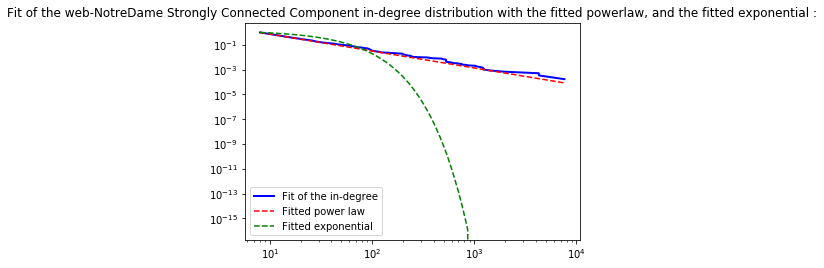

Network statistics :
      Minimum in_degree:      	   1   
      Maximum in_degree:      	 7619  
    Mean number in_degree:    	5.645660391343018

Fitted parameter alpha of the power law distribution: 2.367
Standard error of alpha: 0.018

Here you find the R and p value for comparison between power_law and exponential :
R = 3854.14299
p = 0.00000


In [49]:
out = fit_power_law(G_dame)

**Based on visual inspection, which is a better fit, exponential or power-law?**

Based on visual inspection it's easy to see on the plot above that the power-law is a better fit of the in degree distribution. In fact, the distance for each point of the power law with the fit of the in degree distribution values is smaller than for the fitted exponential. 

### 4.4

**Fit the web-Stanford Strongly Connected Component's in-degree distribution and then plot (in the same figure) the data, the fitted powerlaw, and the fitted exponential, using the plot_ccdf function. Using the distribution_compare function which distribution is a better fit? Does this match what you see in the figure? What is the powerlaw exponent?**

Calculating best minimal value for power law fit


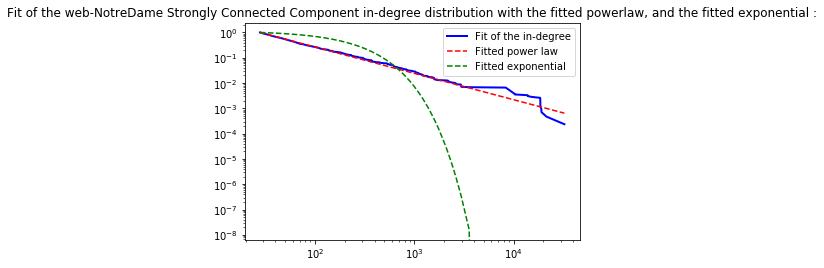

Network statistics :
      Minimum in_degree:      	   1   
      Maximum in_degree:      	 32518 
    Mean number in_degree:    	10.471620652087264

Fitted parameter alpha of the power law distribution: 2.041
Standard error of alpha: 0.016

Here you find the R and p value for comparison between power_law and exponential :
R = 4374.24659
p = 0.00000


In [50]:
out = fit_power_law(G_stanford)

**Using the distribution_compare function which distribution is a better fit? Does this match what you see in the figure? What is the power-law exponent?**

**Using the distribution_compare function which distribution is a better fit?**

To find out which distribution is a better fit, we used the distribution_compare() function. This process allows us to find R and p values :
   * $R$ is the loglikelihood ratio between two candidate distributions (in this case, between the power law distribution and the exponential distribution). If $R$ is positive, the data is more likely to follow the first distribution. If $R$ is negative, the data is more likely to follow the second distribution.
   * $p$ is the significant value. If $p<0.05$, we conclude that the fits are significantly different. For example, if $R>0$, and $p<0.05$, we conclude that the first candidate distribution is significantly better at fitting the data than the second candidate distribution.

**With $R = 4374.24659$ and $p = 0.00000$, we can conclude that the power law is better at fitting the data compare to the exponential, and this fact is significant taking into account the p-value.**

**Does this match what you see in the figure?**

Based on visual inspection it's easy to see on the plot above that the power-law is a better fit of the in degree distribution. In fact, the distance for each point of the power law with the fit of the in degree distribution values is smaller than for the fitted exponential. **Thus distribution_compare function match what you see in the figure.**

**What is the power-law exponent?**

The information on the power-law fit are the following :
   * Fitted parameter alpha of the power law distribution: 2.041
   * Standard error of alpha: 0.016

### 4.5
**Fit the email-EuAll Strongly Connected Component's in-degree distribution and then use the distribution_compare function to determine which of powerlaw, lognormal, or exponential is the best fit. Using the plot_ccdf, function plot the two best fit distributions on the same plot.**

Calculating best minimal value for power law fit


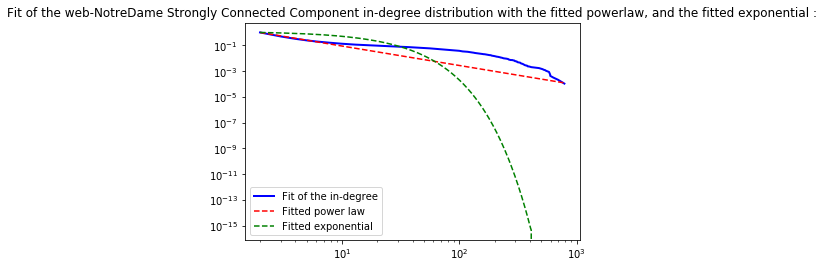


Here you find the R and p value for comparison between power_law and exponential :
R = 14107.21208
p = 0.00000


Calculating best minimal value for power law fit


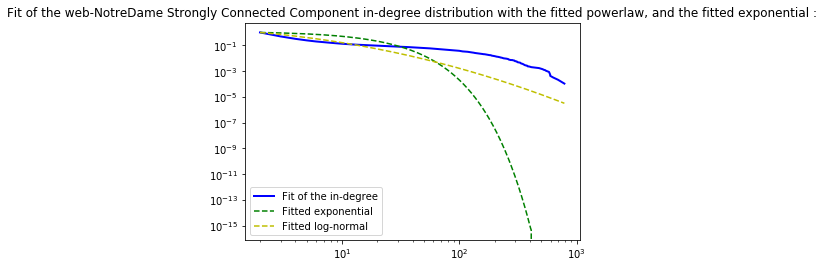

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.



Here you find the R and p value for comparison between exponential and lognormal :
R = -14102.11822
p = 0.00000
In this case, the best law is lognormal.

The two best distributions are : power_law and lognormal


Calculating best minimal value for power law fit


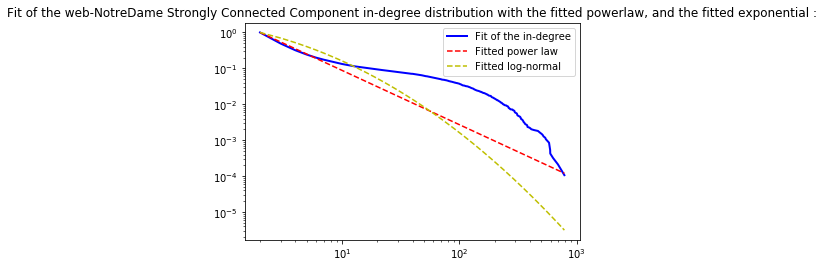


Here you find the R and p value for comparison between power_law and lognormal :
R = 5.09386
p = 0.00000
The best distribution is : power_law


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [51]:
distribution = ['power_law', 'exponential', 'lognormal']
two_best = []
# Find the R and p values for each comparison
R_1, p = fit_power_law(G_email, distribution[0], distribution[1], exponent_pl = False)
if R_1 > 0 : # means that the power law is best thus we test the two other
    two_best.append(distribution[0])
    R_2, p = fit_power_law(G_email, distribution[1], distribution[2], exponent_pl = False)
    if R_2 > 0 :
        two_best.append(distribution[1])
        print(f'In this case, the best law is {distribution[1]}.\n')
    else : 
        two_best.append(distribution[2])
        print(f'In this case, the best law is {distribution[2]}.\n')
else : 
    two_best.append(distribution[1])
    R_2, p = fit_power_law(G_email, distribution[0], distribution[2], exponent_pl = False)
    if R_2 > 0 :
        two_best.append(distribution[0])
        print(f'In this case, the best law is {distribution[0]}.\n')
    else : 
        two_best.append(distribution[2])
        print(f'In this case, the best law is {distribution[2]}.\n')
print(f'The two best distributions are : {two_best[0]} and {two_best[1]}')

R_3, p = fit_power_law(G_email, two_best[0], two_best[1], exponent_pl = False)
best_law = []
if R_3 > 0 :
    best_law.append(two_best[0]) 
else :
    best_law.append(two_best[1]) 
print(f'The best distribution is : {best_law[0]}')

**As you can see above, the two best distributions are the power-law distribution and the log-normal distribution.**

In fact, we first compared power law and exponential. Using the calculated R-value and finding a positive one, we deduce that power law was better than exponential. In a second time, we compare an exponential distribution with the log-normal one. Again, we use the R-value to find out that log normal is better than the exponential. To conclude, using the same experimental process, **we found that the power law was the best distribution. If you want, all R and p values and plot of fitted curves are printed above for each comparison.**

These kinds of broad distributions have a number of implications.
   1. Hubs can be hugely connected and play big roles.
   2. These networks have no intrinsic scale.
   3. These networks can be universal.
   4. They are very likely to be small world (hubs span local areas).
Points 1 and 2 are general properties of any broad (broader than exponential) distribution.


----

----